LABORATOR ANALIZA NUMERICA

TEST#2
1. Interpolarea spline liniara - Ex#1 din Lab#8
2. Derivarea numerica. Diferente finite ascendente, descendente si centrale - Ex#1 din Lab#9
3. Integrarea numerica.
    3.1. Metoda trapezului, Simpson, Newton - Ex#1 din Lab#10
    3.2. Metoda dreptunghiului sumata, trapezului sumata si Simpson sumata - Ex#2 din Lab#10
    3.3. Metoda coeficientilor nedeterminati si metoda de cuadratura Gauss (n = 1) - Ex#1 din Lab#11
4.  Metoda celor mai mici patrate  - Ex #1 b) , c) din Lab# 12

Sa stiti cum se afiseaza un tabel de date cu print folosind format stiintific si format cu virgula mobila cu k cifre.
Sa stiti cum se reprezinta grafice in scara logaritmica pe ambele axe.

0.999999999999999*x**2 - 2.0*x + 3.0


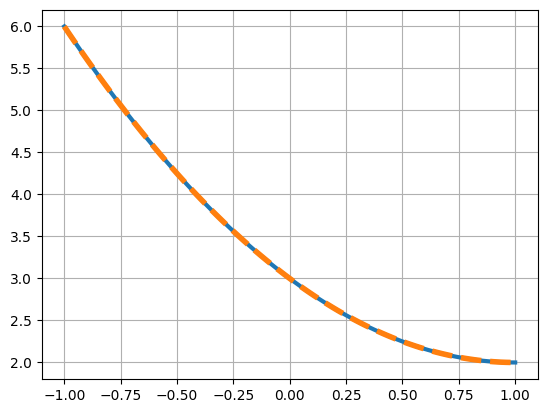

In [ ]:
### Metoda celor mai mici patrate
# Ex1 b) , c) din Lab 12
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


f = lambda x: x**2 - 2*x + 3
a = -1
b = 1
n = 2
w = lambda x: 1

def AproximareL2(f, a, b, w, n):
  B = np.zeros(n+1)
  M = np.zeros((n+1, n+1))
  x = sp.Symbol('x')
  for k in range(n+1):
    B[k] = sp.integrate(w(x)*f(x)*x**k, (x, a, b)).evalf()
    for j in range(n+1):
      M[k, j] = sp.integrate(w(x)*x**(k+j), (x, a, b)).evalf()
  C = np.linalg.solve(M, B)
  pn = 0
  for i in range(n+1):
    pn = pn + C[i]*x**i
  return pn

pn = AproximareL2(f, a, b, w, n)
print(pn)
x = sp.Symbol('x')

pn_func = sp.lambdify(x, pn, 'numpy')
f_fun = sp.lambdify(x, f(x), 'numpy')

fig = plt.figure(1)
ax = plt.axes()
ax.grid(True)
x_graf = np.linspace(a, b, 100)
pn_graf = pn_func(x_graf)
y_graf = f_fun(x_graf)
ax.plot(x_graf, pn_graf, linestyle = '-', lw = 3, label = 'pn(x)')
ax.plot(x_graf, y_graf, linestyle = '--', lw = 4, label = 'f(x)')
'''
fig = plt.figure(2)
ax2 = plt.axes()
ax2.grid(True)
ax2.plot(x_graf, np.abs(y_graf - pn_graf), linestyle = '-', lw = 4, label = 'f(x)')
'''
plt.show()

In [ ]:
### Metoda coeficientilor nedeterminati si metoda de cuadratura Gauss (n = 1)
# Ex1 din Lab11

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def CaudMetCoefNedet(f, a, b, n):
  x = np.linspace(a, b, n+1)
  A = np.zeros((n+1, n+1))
  c = np.zeros_like(x)
  #W = np.zeros_like(x)
  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = x[j]**i
      c[i] = (b**(i+1) - a**(i+1)) / (i+1)
  W = np.linalg.solve(A, c)
  In = 0
  for k in range(n+1):
    In = In + W[k] * f(x[k])
  return In   #integrala exacta

f = lambda x: np.exp(2*x)
n = 10
a = 0
b = 1

In_sol = CaudMetCoefNedet(f, a, b, n)
print(In_sol)

X = sp.Symbol('X')
F = lambda X: sp.exp(2*X)
I_exact = sp.integrate(F(X), (X, a, b))
print(I_exact.evalf())
err = np.abs(In_sol - I_exact.evalf())
print(err)

#%% formula de cuadratura GAUSS
#b) pt cazul n=1
def CuadGauss1(f, a, b):
  x0 = sp.Symbol('x0', negative = True)
  x1 = sp.Symbol('x1', positive = True)
  W0 = sp.Symbol('W0')
  W1 = sp.Symbol('W1')
  x = sp.Symbol('x')
  sol = sp.solve([W0 + W1 - sp.integrate(1, (x, -1, 1)),
                  W0*x0 + W1*x1 - sp.integrate(x, (x, -1, 1)),
                  W0*x0**2 + W1*x1**2 - sp.integrate(x**2, (x, -1, 1)),
                  W0*x0**3 + W1*x1**3 - sp.integrate(x**3, (x, -1, 1))], [W0, W1, x0, x1])
  print(sol)
  w0 = sol[0][0]
  w1 = sol[0][1]
  csi0 = sol[0][2]
  csi1 = sol[0][3]
  I = w0 * f((b-a)/2 * csi0 + (b+a)/2)*(b-a)/2 + w1 * f((b-a)/2 * csi1 + (b+a)/2)*(b-a)/2
  return I

f = lambda x: sp.exp(-x**2)
a = 0
b = 1
I_gauss1 = CuadGauss1(f, a, b).evalf()
print("i gauss= ",I_gauss1)

X = sp.Symbol('X')
F = lambda X: sp.exp(2*X)
I_exact = sp.integrate(F(X), (X, a, b))

err = np.abs(I_gauss1 - I_exact.evalf())
print(err)

3.194528049469989
3.19452804946533
4.66382488184536e-12
[(1, 1, -sqrt(3)/3, sqrt(3)/3)]
i gauss=  0.746594688282860
2.44793336118247


In [ ]:
### Metoda dreptunghiului sumata, trapezului sumata si Simpson sumata
# Ex2 din Lab10

import matplotlib.pyplot as plt
import numpy as np

def CuadraturiNC(f, a, b, n):
    if n == 0:
        I = f((a+b)/2)*(b-a)   # cuadratura dreptunghiului
    elif n == 1:
        I = (f(a)+f(b))*(b-a)/2   # cuadratura trapezului
    elif n == 2:
        I = (f(a) + 4*f((a+b)/2) + f(b))*(b-a)/6   # cuadratura Cavalieri-Simpson
    elif n == 3:
        I = (f(a) + 3*f((a+2*b)/3) + 3*f((2*a+b)/3) + f(b))*(b-a)/8  # cuadratura Newton
    return I

def CuadraturiNCsum(f, a, b, n, m):
    x = np.linspace(a, b, m + 1)
    I = 0
    for k in range(m):
        I += CuadraturiNC(f, x[k], x[k+1], n)
    return I

#%% Exc 2b)

f = lambda x : np.exp(-x**2)
a = 0
b = 1
n = 5

for n in range(4):
    I = CuadraturiNCsum(f, a, b, n, m = 5)
    print('NC sum pt n =', n, ' ', I, '\n')

NC sum pt n = 0   0.7480532524998317 

NC sum pt n = 1   0.744368339763667 

NC sum pt n = 2   0.7468249482544435 

NC sum pt n = 3   0.7468244953350052 



aria dreptunghiului = 0.7788007830714049
aria trapezului =  0.6839397205857212
aria Simpson =  0.7471804289095104
aria Newton =  0.7469923196130519


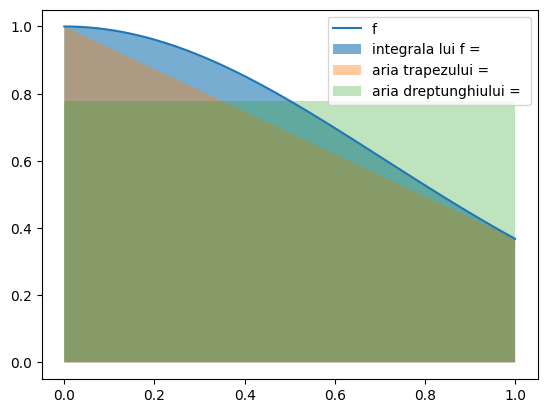

In [ ]:
### Metoda trapezului, Simpson, Newton
# Ex1 din Lab10


import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

#%% Ex 1a) scriem funcțiile var 1

def dreptunghi(f,a,b):
    return f((a+b)/2)*(b-a)  # cuadratura dreptunghiului

def trapez(f,a,b):
    return (f(a)+f(b))*(b-a)/2   # cuadratura trapezului

def Simpson(f, a, b):
    return (f(a) + 4*f((a+b)/2) + f(b))*(b-a)/6   # cuadratura Cavalieri-Simpson

def Newton(f, a, b):
    return (f(a) + 3*f((a+2*b)/3) + 3*f((2*a+b)/3) + f(b))*(b-a)/8  # cuadratura Newton

#%% Var 2
'''
def CuadraturiNC(f, a, b, n):
    if n == 0:
        I = f((a+b)/2)*(b-a)   # cuadratura dreptunghiului
    elif n == 1:
        I = (f(a)+f(b))*(b-a)/2   # cuadratura trapezului
    elif n == 2:
        I = (f(a) + 4*f((a+b)/2) + f(b))*(b-a)/6   # cuadratura Cavalieri-Simpson
    elif n == 3:
        I = (f(a) + 3*f((a+2*b)/3) + 3*f((2*a+b)/3) + f(b))*(b-a)/8  # cuadratura Newton
    return I
'''
#%% Ex 1b) apelăm funcțiile

f = lambda x : np.exp(-x**2)
a = 0
b = 1
print('aria dreptunghiului =',dreptunghi(f, a, b))
print('aria trapezului = ', trapez(f, a, b))
print('aria Simpson = ', Simpson(f, a, b))
print('aria Newton = ', Newton(f, a, b))

#%% apelăm pt var 2
'''
f = lambda x : np.exp(-x**2)
a = 0
b = 1
#b = 10
for n in range(4):
    I = CuadraturiNC(f, a, b, n)
    print('pt n =', n, ' ', I, '\n')
'''
#%% vrem să afișăm graficele ariilor

x = np.linspace(a, b, 100)   #discretizarea
plt.figure()
plt.plot(x, f(x), label = 'f')

# fill_between(vector de abscise, vector de ordonate, alpha = transparența culorii)

plt.fill_between(x, f(x), alpha = 0.6, label = 'integrala lui f = ')
plt.fill_between([a, b], [f(a), f(b)], alpha = 0.4, label = 'aria trapezului = ')
plt.fill_between([a, b], [f((a+b)/2), f((a+b)/2)],alpha = 0.3, label = 'aria dreptunghiului = ')

plt.legend()


In [ ]:
### Derivarea numerica. Diferente finite ascendente, descendente si centrale -
# Ex1 din Lab9
import numpy as np
import matplotlib.pyplot as plt

def FDM(f, df, x, h):
  aprox = np.zeros(3)
  err = np.zeros(3)
  aprox[0] = (f(x+h) - f(x))/h   # ascendente
  err[0] = np.abs(aprox[0] -df(x))
  aprox[1] = (f(x) - f(x-h))/h   # descendente
  err[1] = np.abs(aprox[1] - df(x))
  aprox[2] = (f(x+h) - f(x-h))/(2*h)   # centrale
  err[2] = np.abs(aprox[2] - df(x))
  return aprox, err

f = lambda x: np.exp(2*x)
df = lambda x: 2*np.exp(2*x)
x = 0

# Valorile pentru h = 10^-k, k = 1 până la 10
approximations = []
errors = []

for k in range(11):
    h = 10**(-k)
    approx, err = FDM(f, df, x, h)
    approximations.append(approx)
    errors.append(err)
    print(f"Pentru h = 10^-{k}:")
    print(f"Aproximare diferențe finite ascendente: {approx[0]}, Eroare: {err[0]}")
    print(f"Aproximare diferențe finite descendente: {approx[1]}, Eroare: {err[1]}")
    print(f"Aproximare diferențe finite centrale: {approx[2]}, Eroare: {err[2]}\n")


# Graficul erorilor absolute și al funcției h^2
errors_central = np.array(errors)[:, 2]  # Erorile pentru diferențe finite centrale
h_2 = h_val**2

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(h_val, errors_central, marker='o')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Eroare Absolută')
plt.title('Eroare Absolută pentru Diferențe Finite Centrale')

plt.subplot(1, 2, 2)
plt.plot(h_val, h_2, marker='o')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('h^2')
plt.title('h^2')

plt.tight_layout()
plt.show()

Pentru h = 10^-0:
Aproximare diferențe finite ascendente: 6.38905609893065, Eroare: 4.38905609893065
Aproximare diferențe finite descendente: 0.8646647167633873, Eroare: 1.1353352832366128
Aproximare diferențe finite centrale: 3.626860407847019, Eroare: 1.626860407847019

Pentru h = 10^-1:
Aproximare diferențe finite ascendente: 2.2140275816016985, Eroare: 0.21402758160169855
Aproximare diferențe finite descendente: 1.8126924692201818, Eroare: 0.1873075307798182
Aproximare diferențe finite centrale: 2.01336002541094, Eroare: 0.013360025410940057

Pentru h = 10^-2:
Aproximare diferențe finite ascendente: 2.0201340026755776, Eroare: 0.020134002675577634
Aproximare diferențe finite descendente: 1.9801326693244747, Eroare: 0.019867330675525263
Aproximare diferențe finite centrale: 2.000133336000026, Eroare: 0.00013333600002596313

Pentru h = 10^-3:
Aproximare diferențe finite ascendente: 2.002001334000303, Eroare: 0.00200133400030289
Aproximare diferențe finite descendente: 1.9980013326669

NameError: name 'h_val' is not defined

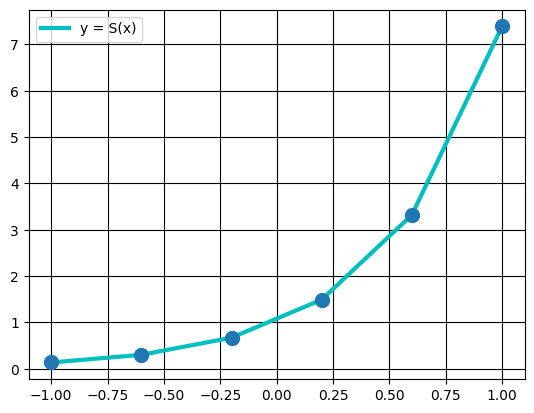

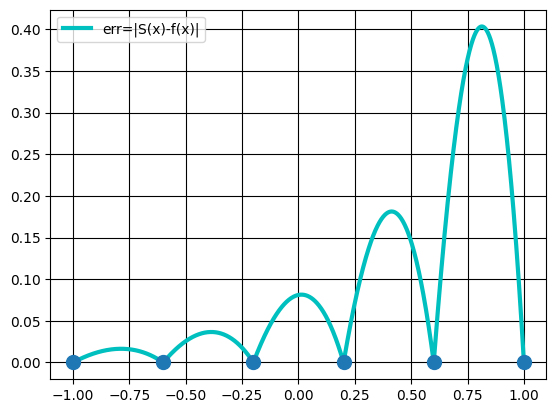

In [ ]:
### Interpolarea spline liniara
# Ex1 din Lab8

import numpy as np
import matplotlib.pyplot as plt

#a)
def SplineLiniar(f, a, b, n, x):
  A = np.zeros(n)
  B = np.zeros(n)
  X = np.linspace(a, b, n+1)
  Y = f(X)
  y = np.zeros_like(x)
  for i in range(len(x)):
      for j in range(0, n):
        if x[i] >= X[j] and x[i] <= X[j+1]:
          A[j] = Y[j]
          B[j] = (Y[j+1] - Y[j]) / (X[j+1] - X[j])
          y[i] = A[j] + B[j]*(x[i] - X[j])
          break
  return y

#%%b)
f = lambda x: np.exp(2*x)
n = 5
a = -1
b = 1
X = np.linspace(a, b, n+1)
Y = f(X)
#S = SplineLiniar(f, a, b, n, x)
#print(S)

#%% afisam functia spline liniara
fig = plt.figure()
ax = plt.axes()
x_graf = np.linspace(a, b, 100)
S_graf = SplineLiniar(f, a, b, n, x_graf)
ax.plot(x_graf, S_graf, linestyle='-', lw=3, color='c', label='y = S(x)')  #y = S[j](x) = a[j] + b[j]*(x − X[j])
ax.grid(True, color='k')
ax.plot(X, Y, linestyle='None', marker='o', markersize=10)
ax.legend(loc='best')

#%% afisam eroarea
fig = plt.figure()
ax = plt.axes()
x_graf = np.linspace(a, b, 1000)
S_graf = SplineLiniar(f, a, b, n, x_graf)
ax.plot(x_graf, np.abs(S_graf - f(x_graf)), linestyle='-', lw=3,color='c' ,label='err=|S(x)-f(x)|')
ax.grid(True, color='k')
ax.plot(X, np.zeros_like(X), linestyle='None', marker='o', markersize=10)
ax.legend(loc='best')


3.06876694037792*x**2 + 3.29153441314721*x + 0.643924867868091


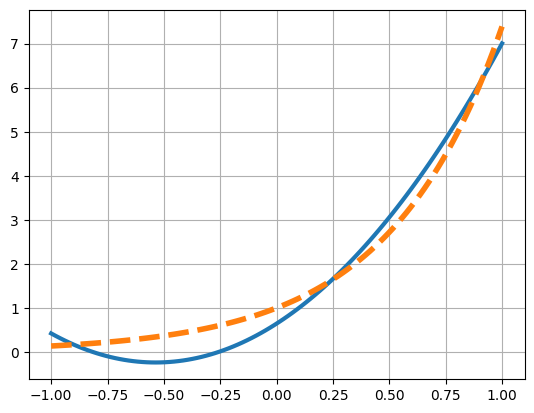

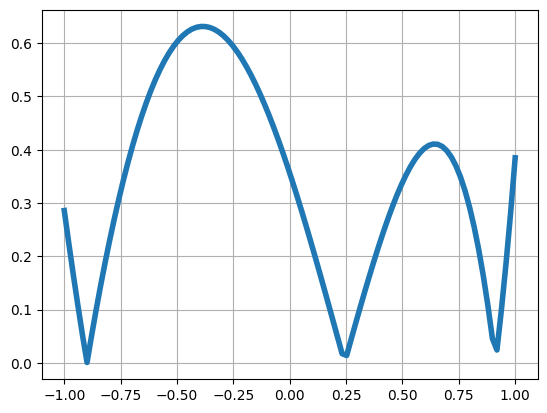

In [ ]:
#lab 12
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


f = lambda x: sp.exp(2*x)
a = -1
b = 1
n = 2
w = lambda x: x**6

def AproximareL2(f, a, b, w, n):
  B = np.zeros(n+1)
  M = np.zeros((n+1, n+1))
  x = sp.Symbol('x')
  for k in range(n+1):
    B[k] = sp.integrate(w(x)*f(x)*x**k, (x, a, b)).evalf()
    for j in range(n+1):
      M[k, j] = sp.integrate(w(x)*x**(k+j), (x, a, b)).evalf()
  C = np.linalg.solve(M, B)
  pn = 0
  for i in range(n+1):
    pn = pn + C[i]*x**i
  return pn

pn = AproximareL2(f, a, b, w, n)
print(pn)
x = sp.Symbol('x')

pn_func = sp.lambdify(x, pn, 'numpy')
f_fun = sp.lambdify(x, f(x), 'numpy')

fig = plt.figure(1)
ax = plt.axes()
ax.grid(True)
x_graf = np.linspace(a, b, 100)
pn_graf = pn_func(x_graf)
y_graf = f_fun(x_graf)
ax.plot(x_graf, pn_graf, linestyle = '-', lw = 3, label = 'pn(x)')
ax.plot(x_graf, y_graf, linestyle = '--', lw = 4, label = 'f(x)')

fig = plt.figure(2)
ax2 = plt.axes()
ax2.grid(True)
ax2.plot(x_graf, np.abs(y_graf - pn_graf), linestyle = '-', lw = 4, label = 'f(x)')
plt.show()

In [ ]:
#lab 11
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def CaudMetCoefNedet(f, a, b, n):
  x = np.linspace(a, b, n+1)
  A = np.zeros((n+1, n+1))
  c = np.zeros_like(x)
  #W = np.zeros_like(x)
  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = x[j]**i
      c[i] = (b**(i+1) - a**(i+1)) / (i+1)
  W = np.linalg.solve(A, c)
  In = 0
  for k in range(n+1):
    In = In + W[k] * f(x[k])
  return In   #integrala exacta

f = lambda x: np.exp(2*x)
n = 10
a = 0
b = 1

In_sol = CaudMetCoefNedet(f, a, b, n)
print(In_sol)

X = sp.Symbol('X')
F = lambda X: sp.exp(2*X)
I_exact = sp.integrate(F(X), (X, a, b))
print(I_exact.evalf())
err = np.abs(In_sol - I_exact.evalf())
print(err)

#%% formula de cuadratura GAUSS
#b) pt cazul n=1
def CuadGauss1(f, a, b):
  x0 = sp.Symbol('x0', negative = True)
  x1 = sp.Symbol('x1', positive = True)
  W0 = sp.Symbol('W0')
  W1 = sp.Symbol('W1')
  x = sp.Symbol('x')
  sol = sp.solve([W0 + W1 - sp.integrate(1, (x, -1, 1)),
                  W0*x0 + W1*x1 - sp.integrate(x, (x, -1, 1)),
                  W0*x0**2 + W1*x1**2 - sp.integrate(x**2, (x, -1, 1)),
                  W0*x0**3 + W1*x1**3 - sp.integrate(x**3, (x, -1, 1))], [W0, W1, x0, x1])
  print(sol)
  w0 = sol[0][0]
  w1 = sol[0][1]
  csi0 = sol[0][2]
  csi1 = sol[0][3]
  I = w0 * f((b-a)/2 * csi0 + (b+a)/2)*(b-a)/2 + w1 * f((b-a)/2 * csi1 + (b+a)/2)*(b-a)/2
  return I

f = lambda x: sp.exp(2*x)
a = 0
b = 1
I_gauss1 = CuadGauss1(f, a, b).evalf()
print(I_gauss1)

X = sp.Symbol('X')
F = lambda X: sp.exp(2*X)
I_exact = sp.integrate(F(X), (X, a, b))

err = np.abs(I_gauss1 - I_exact.evalf())
print(err)

3.194528049469989
3.19452804946533
4.66382488184536e-12
[(1, 1, -sqrt(3)/3, sqrt(3)/3)]
3.18405410268356
0.0104739467817683


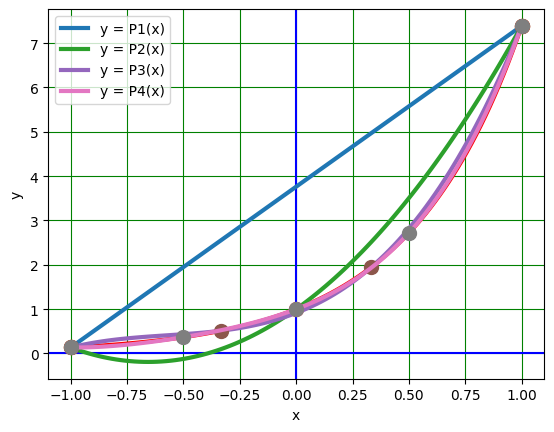

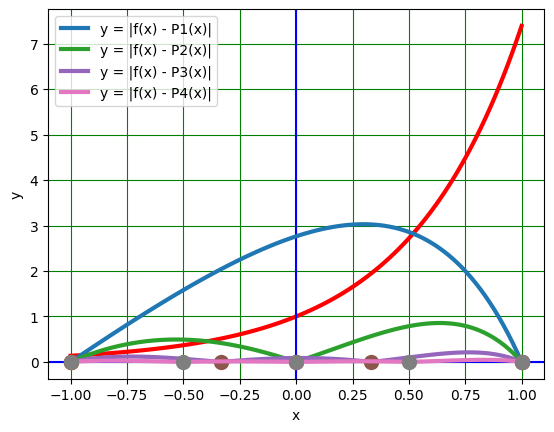

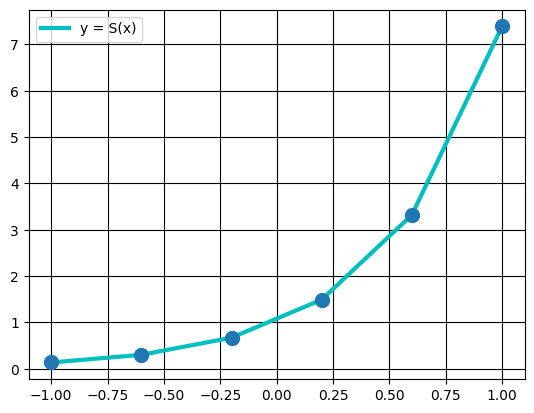

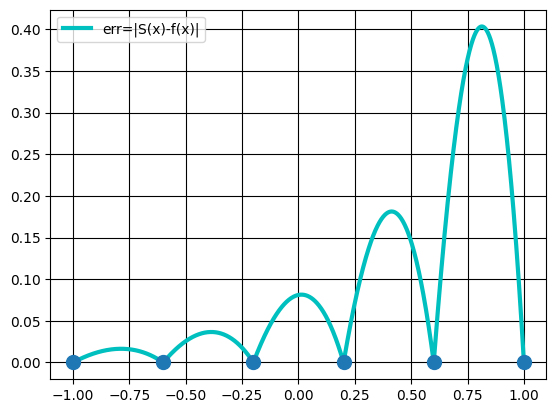

In [ ]:
#  TEMA 3: EX1/LAB6, EX1/LAB8

import numpy as np
import matplotlib.pyplot as plt

def plot(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a,b,100)
    y_graf=f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=3, color='r')
    ax.legend(loc = 'best')
    ax.grid(True, color = 'green')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y = 0, color = 'b')
    ax.axvline(x = 0, color = 'b')
    return ax


#%% EX 1 LAB 6

def MetNeville(f, a, b, n, x):   # f – functia care este aproximata
  X = np.linspace(a, b, n+1)  #nodurile de interpolare Xi, i de la 0 la n
  h = (b-a)/n                 # a, b – capetele intervalului
  Q = np.zeros((n+1, n+1))
  for k in range(n+1):     # n – gradul polinomului de interpolare Lagrange Pn
    X[k] = a + k*h            # x – punctul ın care se evalueaza polinomul de interpolare Lagrange Pn
    Q[k, 0] = f(X[k])
    for i in range(1, n+1):
      for j in range(1, i+1):
        Q[i, j] = ((x - X[i-j])*Q[i, j-1] - (x - X[i])*Q[i-1, j-1]) / (X[i] - X[i-j])
  y = Q[n, n]
  return y   #y = Pn(x)    #y – valoarea polinomului de interpolare Lagrange Pn  punctul x

#%%b) n ∈ {1, 2, 3, 4}

f = lambda x: np.exp(2*x)
a = -1
b = 1
ax = plot(f, a, b, 1)
grade = [1, 2, 3, 4]
x_graf = np.linspace(a, b, 100)
Pn_graf = np.zeros_like(x_graf)  # inițializăm un vector de lungime length x
for n in grade:
  for i in range(len(x_graf)):
      Pn_graf[i] = MetNeville(f, a, b, n, x_graf[i])
  ax.plot(x_graf, Pn_graf, linestyle = '-', lw = 3, label = f"y = P{n}(x)")
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, Y, linestyle = "None", marker = "o", markersize = 10)


#%%c)
ax = plot(f, a, b, 2)
grade = [1, 2, 3, 4]
x_graf = np.linspace(a, b, 100)
Pn_err = np.zeros_like(x_graf)
err_abs = np.zeros_like(x_graf)
for n in grade:
  for i in range(len(x_graf)):
      Pn_err[i] = MetNeville(f, a, b, n, x_graf[i])
      err_abs[i] = np.abs(f(x_graf[i]) - Pn_err[i])
  ax.plot(x_graf, err_abs, linestyle = '-', lw = 3, label = f"y = |f(x) - P{n}(x)|")
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, np.zeros_like(X), linestyle = "None", marker = "o", markersize = 10)


# Ex1 Lab 8
import numpy as np
import matplotlib.pyplot as plt

#a)
def SplineLiniar(f, a, b, n, x):
  A = np.zeros(n)
  B = np.zeros(n)
  X = np.linspace(a, b, n+1)
  Y = f(X)
  y = np.zeros_like(x)
  for i in range(len(x)):
      for j in range(0, n):
        if x[i] >= X[j] and x[i] <= X[j+1]:
          A[j] = Y[j]
          B[j] = (Y[j+1] - Y[j]) / (X[j+1] - X[j])
          y[i] = A[j] + B[j]*(x[i] - X[j])
          break
  return y

#%%b)
f = lambda x: np.exp(2*x)
n = 5
a = -1
b = 1
X = np.linspace(a, b, n+1)
Y = f(X)
#S = SplineLiniar(f, a, b, n, x)
#print(S)

#%% afisam functia spline liniara
fig = plt.figure()
ax = plt.axes()
x_graf = np.linspace(a, b, 100)
S_graf = SplineLiniar(f, a, b, n, x_graf)
ax.plot(x_graf, S_graf, linestyle='-', lw=3, color='c', label='y = S(x)')  #y = S[j](x) = a[j] + b[j]*(x − X[j])
ax.grid(True, color='k')
ax.plot(X, Y, linestyle='None', marker='o', markersize=10)
ax.legend(loc='best')
#%% afisam eroarea
fig = plt.figure()
ax = plt.axes()
x_graf = np.linspace(a, b, 1000)
S_graf = SplineLiniar(f, a, b, n, x_graf)
ax.plot(x_graf, np.abs(S_graf - f(x_graf)), linestyle='-', lw=3,color='c' ,label='err=|S(x)-f(x)|')
ax.grid(True, color='k')
ax.plot(X, np.zeros_like(X), linestyle='None', marker='o', markersize=10)
ax.legend(loc='best')


In [ ]:
#lab 10

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def NewtonCotesINCHISA(f, a, b, n):
  h = (b-a)/n
  In = 0
  t = sp.Symbol('t')
  for k in range(0, n+1):
    pr = 1
    for i in range(0, n+1):
      if i != k:
        pr = pr*(t-i)/(k-i)
    pr = pr*h
    Wk = sp.integrate(pr, (t, 0, n))
    In = In + Wk * f(a+k*h)  # xk = a + k * h
  return In

a = sp.Symbol('a')
b = sp.Symbol('b')
f = sp.Function('f', real = True)
#formula trapezului
f_trapez = NewtonCotesINCHISA(f, a, b, n = 1)
sp.pprint(f_trapez)

#formula Simpson
f_Simpson = NewtonCotesINCHISA(f, a, b, n = 2)
sp.pprint(f_Simpson)
print('\n')
#formula Newton
f_Newton = NewtonCotesINCHISA(f, a, b, n = 3)
sp.pprint(f_Newton)

#EX
x = sp.Symbol('x')
f = lambda x: sp.exp(-x**2)
#f1 = sp.Function('f1', real = True)
I_exact = sp.integrate(f(x), (x, 0, 1)).evalf(10)
sp.pprint(I_exact)

⎛  a   b⎞        ⎛  a   b⎞     
⎜- ─ + ─⎟⋅f(a) + ⎜- ─ + ─⎟⋅f(b)
⎝  2   2⎠        ⎝  2   2⎠     
⎛  2⋅a   2⋅b⎞  ⎛a   b⎞   ⎛  a   b⎞        ⎛  a   b⎞     
⎜- ─── + ───⎟⋅f⎜─ + ─⎟ + ⎜- ─ + ─⎟⋅f(a) + ⎜- ─ + ─⎟⋅f(b)
⎝   3     3 ⎠  ⎝2   2⎠   ⎝  6   6⎠        ⎝  6   6⎠     


⎛  3⋅a   3⋅b⎞  ⎛a   2⋅b⎞   ⎛  3⋅a   3⋅b⎞  ⎛2⋅a   b⎞   ⎛  a   b⎞        ⎛  a   
⎜- ─── + ───⎟⋅f⎜─ + ───⎟ + ⎜- ─── + ───⎟⋅f⎜─── + ─⎟ + ⎜- ─ + ─⎟⋅f(a) + ⎜- ─ + 
⎝   8     8 ⎠  ⎝3    3 ⎠   ⎝   8     8 ⎠  ⎝ 3    3⎠   ⎝  8   8⎠        ⎝  8   

b⎞     
─⎟⋅f(b)
8⎠     
0.7468241328


0.019105873514217997


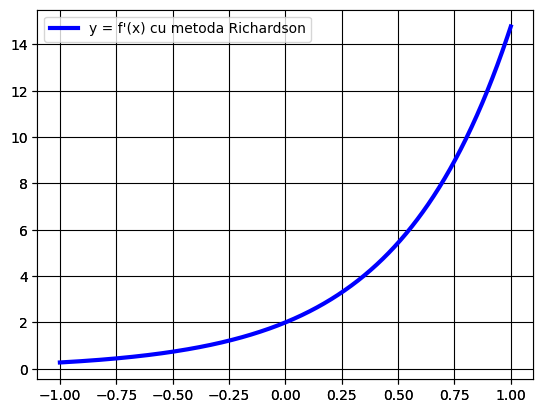

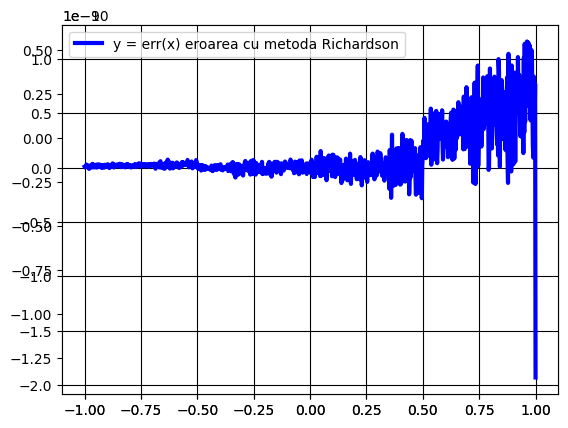

In [ ]:
#%% lab 9

#%%definim procedura Richardson
import numpy as np
import matplotlib.pyplot as plt

def Richardson(f, x, h, n):
    phi1 = lambda h: (f(x+h) - f(x)) / h  #aproximarea derivatei de ordinul h**1
    Q = np.zeros((n, n))
    for i in range(1, n):
        Q[i, 0] = phi1(h/(2**i))
    for j in range(1, n):
        for i in range(j, n):
            Q[i, j] = (2**j * Q[i, j-1] - Q[i-1, j-1]) / (2**j-1)
    df = Q[n-1, n-1]   #aproximarea derivatei de ordinul h**n
    return df

f = lambda x: np.exp(2*x)
df = lambda x: 2 * np.exp(2*x)   #derivata lui f

df_R = Richardson(f, x = 0.5, h = 10**-1, n = 5)
err = df(0.5) - df_R
print(err)

#reprezentarea grafica a derivatei pe [-1, 1]

f = lambda x: np.exp(2*x)
df = lambda x: 2 * np.exp(2*x)   #derivata lui f

fig = plt.figure(1)
ax = plt.axes()
x = np.linspace(-1, 1, 100)
h = x[1] - x[0]
n = 10
df_R = np.zeros_like(x)
err = np.zeros_like(x)
for i in range(len(x)):
  df_R[i] = Richardson(f, x[i], h, n)
  err[i] = df_R[i] - df(x[i])
ax.plot(x, df_R, linestyle = '-', lw = 3, color = 'b', label = "y = f'(x) cu metoda Richardson")
ax.grid(True, color = 'k')
ax.legend(loc = 'best')

fig = plt.figure(2)
ax = plt.axes()
ax.plot(x, err, linestyle = '-', lw = 3, color = 'b', label = "y = err(x) eroarea cu metoda Richardson")
ax.grid(True, color = 'k')
ax.legend(loc = 'best')

f = lambda x: np.exp(2*x)
df = lambda x: 2 * np.exp(2*x)   #derivata lui f

fig = plt.figure(1)
ax = plt.axes()
x = np.linspace(-1, 1, 1000)
h = x[1] - x[0]
n = 10
df_R = np.zeros_like(x)
err = np.zeros_like(x)
for i in range(len(x)):
  df_R[i] = Richardson(f, x[i], h, n)
  err[i] = df_R[i] - df(x[i])
ax.plot(x, df_R, linestyle = '-', lw = 3, color = 'b', label = "y = f'(x) cu metoda Richardson")
ax.grid(True, color = 'k')
ax.legend(loc = 'best')

fig = plt.figure(2)
ax = plt.axes()
ax.plot(x, err, linestyle = '-', lw = 3, color = 'b', label = "y = err(x) eroarea cu metoda Richardson")
ax.grid(True, color = 'k')
ax.legend(loc = 'best')

[0.36785598 2.71810307]


(0.2799999999999999, 13.920000000000002, 0.1275, 2.8225000000000002)

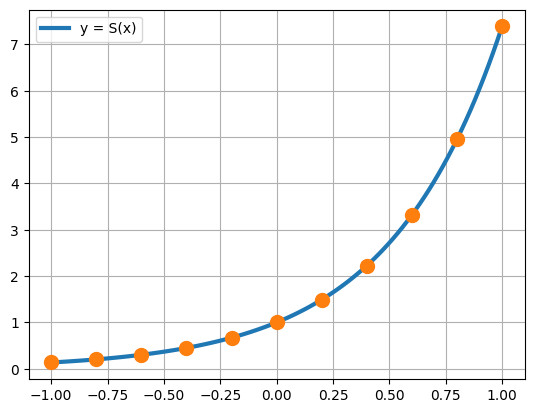

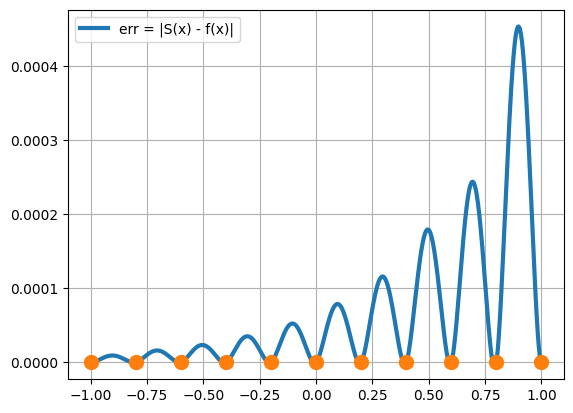

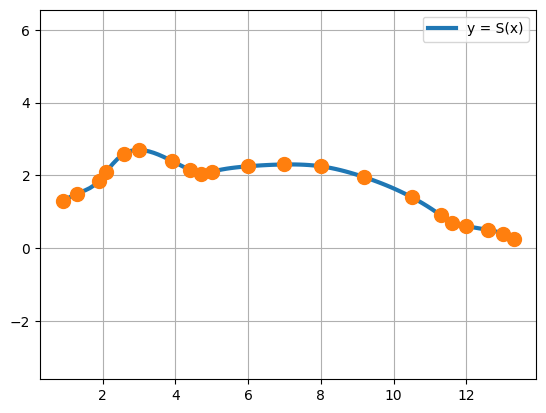

In [ ]:
#lab 8

import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(2 * x)
n = 10
df = lambda x: 2 * np.exp(2 * x)
xmin = -1
xmax = 1
dfa = df(xmin)
dfb = df(xmax)
X = np.linspace(xmin,xmax,n+1)
Y = f(X)

def SplineCubic(X, Y, dfa, dfb, x):
   n = len(X) - 1
   h = np.zeros(n)
   a = np.zeros(n)
   c = np.zeros(n)
   d = np.zeros(n)
   S = np.zeros_like(x)
   for j in range(0, n):
       h[j] = X[j+1] - X[j]
       a[j] = Y[j]
   #rezlvam sistemul in care Bb = w din care vom scoate b
   B = np.zeros((n+1, n+1))
   B[0, 0] = 1
   B[n, n] = 1
   for j in range(1, n):
       B[j, j] = 2/h[j] + 2/h[j-1]
       B[j, j-1] = 1/h[j-1]
       B[j, j+1] = 1/h[j]
   W = np.zeros(n+1)
   W[0] = dfa
   W[n] = dfb
   for j in range(1, n):
       W[j] = -3/(h[j-1]**2) * (Y[j-1]) + (3/(h[j-1]**2) - 3/(h[j]**2)) * Y[j] + 3/(h[j]**2) * Y[j+1]
   b = np.linalg.solve(B, W)
   for j in range(0, n):
       c[j] = 3/(h[j]**2) * (Y[j+1]-Y[j]) - (b[j+1] + 2*b[j])/h[j]
       d[j] = -2/(h[j]**3) * (Y[j+1]-Y[j]) + (b[j+1] + b[j])/(h[j]**2)
   for i in range(len(x)):
     for j in range(0, n):
       if (X[j]<=x[i]) and (X[j+1]>=x[i]):
           S[i] = a[j] + b[j]*(x[i]-X[j]) + c[j]*(x[i]-X[j])**2 + d[j]*(x[i]-X[j])**3
           break
   return S

x = np.array([-0.5, 0.5])
S = SplineCubic(X, Y, dfa, dfb, x)
print(S)

fig = plt.figure()
ax = plt.axes()
x_grafic = np.linspace(xmin, xmax, 100)
S_grafic = SplineCubic(X, Y, dfa, dfb, x_grafic)
ax.plot(x_grafic, S_grafic, linestyle = '-', lw = 3, label = 'y = S(x)')
ax.plot(X, Y, linestyle = 'None', marker = 'o', markersize=10)
ax.grid(True)
ax.legend(loc = 'best')

fig = plt.figure()
ax = plt.axes()
x_grafic = np.linspace(xmin, xmax, 1000)
S_grafic = SplineCubic(X, Y, dfa, dfb, x_grafic)

ax.plot(x_grafic, np.abs(S_grafic - f(x_grafic)), linestyle = '-', lw = 3, label = 'err = |S(x) - f(x)|')
ax.plot(X, np.zeros_like(X), linestyle = 'None', marker = 'o', markersize=10)
ax.grid(True)
ax.legend(loc = 'best')

#Problema ratei salbatice

X = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
Y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])
fig = plt.figure()
ax = plt.axes()
x_grafic = np.linspace(X[0], X[-1], 100)
S_grafic = SplineCubic(X, Y, (Y[1] - Y[0])/(X[1] - X[0]), (Y[-1] - Y[-2])/(X[-1] - X[-2]), x_grafic)
ax.plot(x_grafic, S_grafic, linestyle = '-', lw = 3, label = 'y = S(x)')
ax.plot(X, Y, linestyle = 'None', marker = 'o', markersize=10)
ax.grid(True)
ax.legend(loc = 'best')
ax.axis('equal')

#ex fac un contur de catel (folosesc 3 curbe ca la alea de la rata)


[0.4191691  2.96192874]


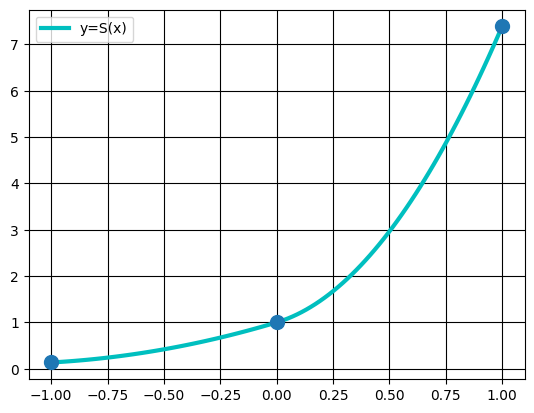

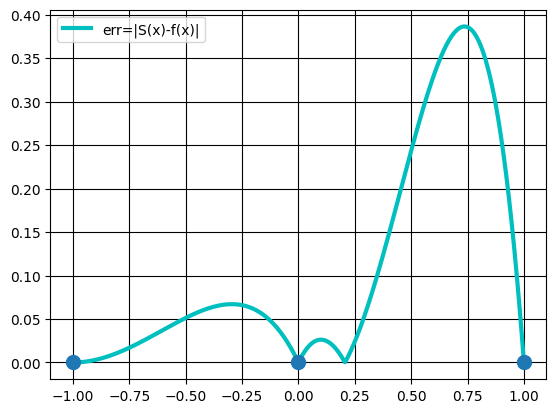

In [ ]:
#LAB 7

import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(2*x)
df = lambda x: 2*np.exp(2*x)
xmin = -1
xmax = 1
dfa = df(xmin)      #derivata in capatul din stanga
X = np.linspace(xmin, xmax, n)
Y = f(X)

def SplinePatratic(X, Y, dfa, x):
    n = len(X) - 1
    h = np.zeros(n)
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    S = np.zeros_like(x)
    for j in range(0, n-1):
      h[j] = X[j+1] - X[j]
      a[j] = f(X[j])
    b[0] = dfa
    for j in range(0, n-1):
        b[j+1] = (2/h[j]) * (Y[j+1] - Y[j]) - b[j]
    for j in range(0, n-1):
        c[j] = 1/(h[j]**2) * (Y[j+1] - Y[j]) - (b[j]/h[j])
    for i in range(len(x)):
        for j in range(0, n):
            if x[i] >= X[j] and x[i] <= X[j+1]:
                S[i] = a[j] + b[j]*(x[i] - X[j]) + c[j]*(x[i] - X[j])**2
                break
    return S


x = np.array([-0.5,0.5])
S = SplinePatratic(X, Y, dfa, x)
print(S)

fig = plt.figure()
ax = plt.axes()
x_graf = np.linspace(xmin, xmax, 100)
S_graf = SplinePatratic(X, Y, dfa, x_graf)
ax.plot(x_graf,S_graf,linestyle='-',lw=3,color='c',label='y=S(x)')
ax.grid(True,color='k')
ax.plot(X,Y,linestyle='None',marker='o',markersize=10)
ax.legend(loc='best')

fig = plt.figure()
ax = plt.axes()
x_graf = np.linspace(xmin,xmax,1000)
S_graf = SplinePatratic(X, Y, dfa, x_graf)
ax.plot(x_graf,np.abs(S_graf-f(x_graf)),linestyle='-',lw=3,color='c',label='err=|S(x)-f(x)|')
ax.grid(True,color='k')
ax.plot(X,np.zeros_like(X),linestyle='None',marker='o',markersize=10)
ax.legend(loc='best')



In [ ]:
'''
METODE LABORATOR CURS:

METODA BISECTIEI
METODA SECANTEI
METODA NewtonRaphson
METODA NEWTON RAPTON MODIFICA 1(SE CUNOASTE M)
METODA PUNCTULUI FIX
'''

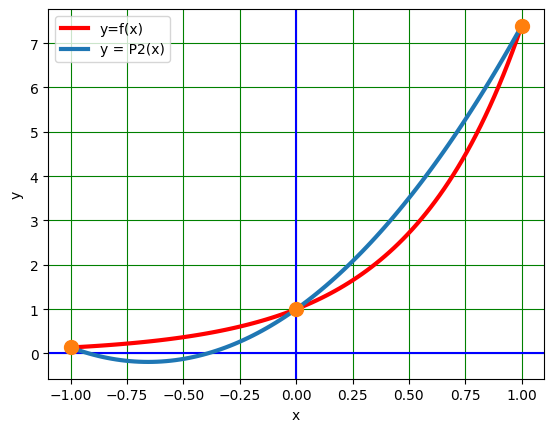

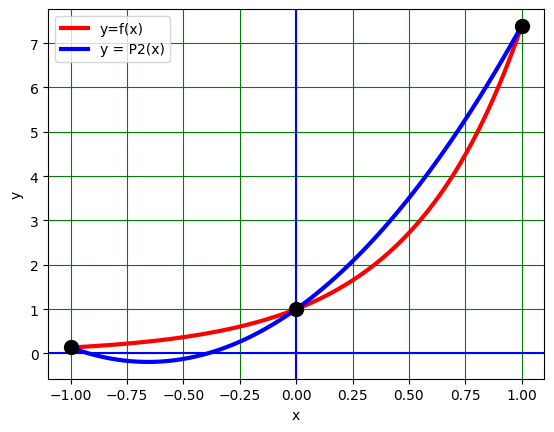

In [ ]:
###LAB 6
import numpy as np
import matplotlib.pyplot as plt

def plot(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a,b,100)
    y_graf=f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=3, color='r', label="y=f(x)")
    ax.legend(loc = 'best')
    ax.grid(True, color = 'green')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y = 0, color = 'b')
    ax.axvline(x = 0, color = 'b')
    return ax

#%% Polinomul de interpolarea Lagrange
# Metoda naiva

def MetNewton(f, a, b, n, x):
  #f = functia interpolara, intervalul [a, b], gradul polinomului n,
  #x = punctul in care se evaluaza poliomul Lagrange (scalar/vector)
  #returneaza Pn = valoarea polinomului in x
  X = np.linspace(a, b, n+1)  #nodurile de interpolare Xi, i de la 0 la n
  Y = f(X)
  A = np.zeros((n+1, n+1))
  for i in range(0, n+1):
    A[i, 0] = 1
  for i in range(1, n+1):
    for j in range(1, i+1):
      P = 1
      for k in range(0, j):
        P = P * (X[i] - X[k])
      A[i, j] = P
  c = np.linalg.solve(A, Y)
  Pn  = c[0]
  for k in range(1, n+1):
    Pr = np.ones_like(x)
    for j in range(0, k):
      Pr = Pr *(x-X[j])
    Pn = Pn + c[k]*Pr
  return Pn

f = lambda x: np.exp(2*x)
a = -1
b = 1
ax = plot(f, a, b, 1)
grade = [2]
for n in grade:
  x_graf = np.linspace(a, b, 100)
  Pn_graf = MetNewton(f, a, b, n, x_graf)
  ax.plot(x_graf, Pn_graf, linestyle = '-', lw = 3, label = f"y = P{n}(x)")
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, Y, linestyle = "None", marker = "o", markersize = 10)


def MetNewtonDD(f, a, b, n, x):
  #f = functia interpolara, intervalul [a, b], gradul polinomului n,
  #x = punctul in care se evaluaza poliomul Lagrange (scalar/vector)
  #returneaza Pn = valoarea polinomului in x
  X = np.linspace(a, b, n+1)  #nodurile de interpolare Xi, i de la 0 la n
  Y = f(X)
  Q = np.zeros((n+1, n+1))
  for i in range(0, n+1):
    Q[i, 0] = Y[i]
  for i in range(1, n+1):
    for j in range(1, i+1):
      for k in range(0, j):
        Q[i, j] = (Q[i, j-1] - Q[i-1, j-1]) / (X[i] - X[i-j])
  Pn  = Q[0, 0]
  for k in range(1, n+1):
    P = np.ones_like(x)
    for j in range(0, k):
      P = P *(x-X[j])
    Pn = Pn + Q[k, k]*P
  return Pn

f = lambda x: np.exp(2*x)
a = -1
b = 1
ax = plot(f, a, b, 2)
grade = [2]
for n in grade:
  x_graf = np.linspace(a, b, 100)
  Pn_graf = MetNewtonDD(f, a, b, n, x_graf)
  ax.plot(x_graf, Pn_graf, linestyle = '-', lw = 3, label = f"y = P{n}(x)", color = 'b')
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, Y, linestyle = "None", marker = "o", markersize = 10, color = 'k')


##EX
'''
f[x0] = f(x0) = f(-1) = 1 / e
f[x1] = f(x1) = f(0) = 1
f[x2] = f(x2) = f(1) = e

f[x0, x1] = (1 - 1/e) / (0 - (-1)) = e-1 / e
f[x1, x2] = (e - 1) / (1 - 0) = e-1

f[x0, x1, x2] = ... = e^2 - 2e +1 / 2e

P2(x) = 1/e + (e-1 / e) * (x+1) + (e^2 - 2e +1 / 2e) * (x+1)x

'''
f = lambda x: np.exp(x)



In [ ]:
  A = np.zeros((n+1, n+1))
  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = X[i]**j
  c = np.linalg.solve(A, Y)    #vectorul coeficientilor
  Pn = 0
  for i in range(n+1):
    Pn = Pn + c[i]*x**i

r cu criteriul 1 este: 1.732050810009241
n cu criteriul 1 este: 27


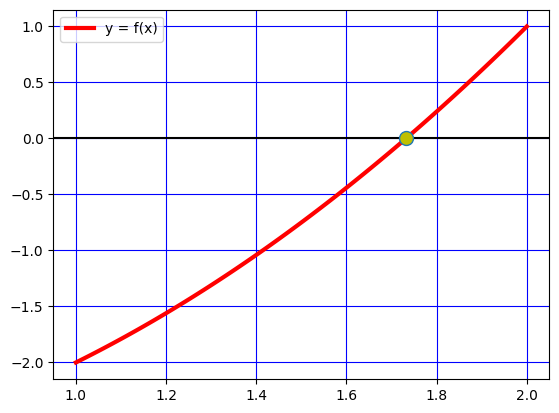

In [ ]:
#lab 1

import numpy as np
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
'''
#Exercitiul #1
#(a)
def plot(f, a,b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a,b,100)
    y_graf = f(x_graf)
    ax.plot(x_graf,y_graf,linestyle = '-', lw = 3, color = 'r', label = 'y = f(x)')
    ax.legend(loc = 'best')
    ax.grid(True, color = 'b')
    ax.axhline(y = 0, color = 'k')
    return ax

f = lambda x: x**6 - x - 1
ax1 = plot(f,-2,2,1)

#(b)
#Calculam solutia pe intervalul [-1,0]
a = [-1]
b = [0]
x = [a[0] + (b[0] - a[0])/2]
n = 0
TOL = 10 ** (-5)
while (np.abs(f(x[n])) >= TOL):
    n = n + 1
    if f(a[n-1]) * f(x[n-1])<=0:
        a.append(a[n-1])# an = an-1
        b.append(x[n-1]) #bn = xn-1
    else:
        a.append(x[n-1])# an = xn-1
        b.append(b[n-1])# bn = bn-1
    x.append(a[n] + (b[n] - a[n])/2 )

ax1.plot(x[n],f(x[n]), linestyle = 'None', marker = 'o', markersize = 10, markerfacecolor = 'g')

#Calculam solutia pe intervalul [1,2]
a = [1]
b = [2]
x = [a[0] + (b[0] - a[0])/2]
n = 0
TOL = 10 ** (-5)
while (np.abs(f(x[n])) >= TOL):
    n = n + 1
    if f(a[n-1]) * f(x[n-1])<=0:
        a.append(a[n-1])# an = an-1
        b.append(x[n-1]) #bn = xn-1
    else:
        a.append(x[n-1])# an = xn-1
        b.append(b[n-1])# bn = bn-1
    x.append(a[n] + (b[n] - a[n])/2 )

ax1.plot(x[n],f(x[n]), linestyle = 'None', marker = 'o', markersize = 10, markerfacecolor = 'y')

#Afisarea datelor sub forma de tabel
# Tabel_data = PrettyTabel(['n','xn','|f(xn)|'])
# for k in range(n+1):
#     Tabel_data.add_row([f'{k}', f'{x[k]}', f' {np.abs(f(x[k]))}'  ])
# print(Tabel_data)
'''
#Exercitiul #3
def bisectie(f,a0,b0, ITMAX, TOL, OPT = 1):
    a = [a0]
    b = [b0]
    x = [a[0] + (b[0] - a[0])/2]
    n = 0
    conditie = 1
    if (OPT == 1):
        conditie = np.abs(b[n]- a[n]) > TOL
    elif (OPT == 3):
        conditie = np.abs(f(x[n]))>TOL
    while (conditie and n<=ITMAX):
        n = n + 1
        if f(a[n-1]) * f(x[n-1])<=0:
            a.append(a[n-1])# an = an-1
            b.append(x[n-1]) #bn = xn-1
        else:
            a.append(x[n-1])# an = xn-1
            b.append(b[n-1])# bn = bn-1
        x.append(a[n] + (b[n] - a[n])/2 )
        if (OPT == 1):
            conditie = np.abs(b[n]- a[n]) > TOL
        elif (OPT == 2):
            conditie = np.abs(x[n] - x[n-1])/np.abs(x[n-1]) > TOL
        elif (OPT == 3):
            conditie = np.abs(f(x[n]))>TOL
    return x[n],n

#(b)
f = lambda x:x**2 - 3
ax2 = plot(f,1,2,2)

r_crit1, n_crit1 = bisectie(f,1,2, 10**4, 10**(-8), OPT = 1)
print('r cu criteriul 1 este:',r_crit1)
print('n cu criteriul 1 este:', n_crit1)
'''
r_crit2, n_crit2 = bisectie(f,1,2, 10**4, 10**(-8), OPT = 2)
print('r cu criteriul 2 este:',r_crit2)
print('n cu criteriul 2 este:', n_crit2)

r_crit3, n_crit3 = bisectie(f,1,2, 10**4, 10**(-8), OPT = 3)
print('r cu criteriul 3 este:',r_crit3)
print('n cu criteriul 3 este:', n_crit3)
'''
ax2.plot(r_crit1,f(r_crit1), linestyle = 'None', marker = 'o', markersize = 10, markerfacecolor = 'y')



In [ ]:
#lab 2

import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Exercitiul 1

f = lambda x: x ** 3 + 4 * x ** 2 - 10


# Graficul functiei
def grafic(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()  # pune la dispozitie sistemul de axe
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=3, color='b', label='y=f(x)')
    ax.legend(loc='best')
    ax.grid(True, color='k')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y=0, color='k')  # afiseaza axa Ox
    ax.axvline(x=0, color='k')  # afiseaza axa Oy
    return ax


a = 1
b = 1.58       #Alegem un subinterval al intervalului [1,2], astfel incat acesta sa reprezinte domeniul
               #de definitie comun al functiilor phi_i, i= 1,3
ax_f = grafic(f, a, b, 1)

# a)
# N = nr max de iteratii
def MetPunctFix(phi, x0, N):
    x = np.zeros(N + 1)  # are elemente de la x0 pana la xn
    x[0] = x0
    for n in range(1, N + 1):
        x[n] = phi(x[n - 1])
    return x[n]

# b)
# Definim cele 4 functii in mod simbolic

import sympy as sp

x = sp.symbols('x')
phi_1 = -x ** 3 - 4 * x ** 2 + x + 10
phi_2 = sp.sqrt(10 / x - 4 * x)
phi_3 = 1 / 2 * sp.sqrt(10 - x ** 3)
phi_4 = sp.sqrt(10 / (x + 4))

dphi_1 = sp.diff(phi_1, x)  # derivam simbolic cu functia sp.diff
dphi_2 = sp.diff(phi_2, x)
dphi_3 = phi_3.diff(x)  # derivam simbolic cu metoda diff
dphi_4 = phi_4.diff(x)

# acum definim ca functii numerice ca sa putem lucra in calcule cu ele
Phi_1 = sp.lambdify(x, phi_1, 'numpy')  # 'numpy' ca functia sa poata primi drept argument vector din numpy
Phi_2 = sp.lambdify(x, phi_2, 'numpy')
Phi_3 = sp.lambdify(x, phi_3, 'numpy')
Phi_4 = sp.lambdify(x, phi_4, 'numpy')

DPhi_1 = sp.lambdify(x, dphi_1, 'numpy')
DPhi_2 = sp.lambdify(x, dphi_2, 'numpy')
DPhi_3 = sp.lambdify(x, dphi_3, 'numpy')
DPhi_4 = sp.lambdify(x, dphi_4, 'numpy')

fig, ax = plt.subplots(2, 2, figsize=(10, 8))  # impartim celula in 2 linii si 2 coloane
x_graf = np.linspace(a, b, 100)  # discretizam intervalul ca sa putem afisa graficele
# functiilor si ale derivatelor
ax[0][0].plot(x_graf, Phi_1(x_graf), linestyle='-', lw=3, color='b', label='$y=\phi_1(x)$')
ax[0][0].legend(loc='best')
ax[0][0].grid(True, color='k')
ax[0][0].axhline(y=a, color='r')
ax[0][0].axhline(y=b, color='r')
# ultimile doua linii de cod reprezinta grafic doua linii orizontale pentru a vedea daca graficul
# functiei phi se incadreaza intre ele (ipoteza phi(x) apartine [a,b]).

ax[0][1].plot(x_graf, Phi_2(x_graf), linestyle='-', lw=3, color='b', label='$y=\phi_2(x)$')
ax[0][1].legend(loc='best')
ax[0][1].grid(True, color='k')
ax[0][1].axhline(y=a, color='r')
ax[0][1].axhline(y=b, color='r')

ax[1][0].plot(x_graf, Phi_3(x_graf), linestyle='-', lw=3, color='b', label='$y=\phi_3(x)$')
ax[1][0].legend(loc='best')
ax[1][0].grid(True, color='k')
ax[1][0].axhline(y=a, color='r')
ax[1][0].axhline(y=b, color='r')

ax[1][1].plot(x_graf, Phi_4(x_graf), linestyle='-', lw=3, color='b', label='$y=\phi_4(x)$')
ax[1][1].legend(loc='best')
ax[1][1].grid(True, color='k')
ax[1][1].axhline(y=a, color='r')
ax[1][1].axhline(y=b, color='r')

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
x_graf = np.linspace(a, b, 100)

ax[0][0].plot(x_graf, np.abs(DPhi_1(x_graf)), linestyle='-', lw=3, color='b', label="$y=|\phi_1'(x)|$")
ax[0][0].legend(loc='best')
ax[0][0].grid(True, color='k')
ax[0][0].axhline(y=0, color='r')
ax[0][0].axhline(y=1, color='r')

ax[0][1].plot(x_graf, np.abs(DPhi_2(x_graf)), linestyle='-', lw=3, color='b', label="$y=|\phi_2'(x)|$")
ax[0][1].legend(loc='best')
ax[0][1].grid(True, color='k')
ax[0][1].axhline(y=0, color='r')
ax[0][1].axhline(y=1, color='r')

ax[1][0].plot(x_graf, np.abs(DPhi_3(x_graf)), linestyle='-', lw=3, color='b', label="$y=|\phi_3'(x)|$")
ax[1][0].legend(loc='best')
ax[1][0].grid(True, color='k')
ax[1][0].axhline(y=0, color='r')
ax[1][0].axhline(y=1, color='r')

ax[1][1].plot(x_graf, np.abs(DPhi_4(x_graf)), linestyle='-', lw=3, color='b', label="$y=|\phi_4'(x)|$")
ax[1][1].legend(loc='best')
ax[1][1].grid(True, color='k')
ax[1][1].axhline(y=0, color='r')
ax[1][1].axhline(y=1, color='r')

#Observam ca doar functiile phi_3 si phi_4 satisfac integral ipotezele teoremei Brouwer, astfel ca sirurile xn construite
#in baza celor doua functii vor converge sigur catre radacina functiei f.

#Punctul fix calculat cu phi_3
punctfix_phi_3 = MetPunctFix(Phi_3, 1, 20)
print('Radacina functiei f folosind metoda punctului fix in baza functiei phi3 este:',punctfix_phi_3)

#Punctul fix calculat cu phi_4
punctfix_phi_4 = MetPunctFix(Phi_4, 1, 20)
print('Radacina functiei f folosind metoda punctului fix in baza functiei phi4 este:',punctfix_phi_4)

print('Pentru constructia sirului xn pot fi folosite si celelalte functii phi1,phi2, \n')
print( 'insa acestea nu ofera  garantia faptului ca sirul este convergent.')
print('In cazul folosirii functiilor phi1 si phi2 va fi necesar sa se verifice convergenta sirului.')

ax_f.plot(punctfix_phi_3, f(punctfix_phi_3), linestyle=None, marker='o', markersize=10, markerfacecolor='g')
ax_f.plot(punctfix_phi_4, f(punctfix_phi_4), linestyle=None, marker='*', markersize=10, markerfacecolor='y')

'''
# exercitiul 2

def NewtonRaphson(f, df, x0, N):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N + 1):
        x[n] = x[n - 1] - f(x[n - 1]) / df(x[n - 1])
    return x


x = sp.symbols('x')
f_expresie = x + sp.exp(-x ** 2) * sp.cos(x)
df_expresie = f_expresie.diff(x)

f_functie = sp.lambdify(x, f_expresie, 'numpy')
df_functie = sp.lambdify(x, df_expresie, 'numpy')

solutie = NewtonRaphson(f_functie, df_functie, 0, 10)
print('Solutia aproximativa a ecuatiei f(x) = 0 calculata cu metoda Newton-Raphson cu 10 iteratii este:', solutie[10])
print('Afisare tabel: iteratie n, aproximatie x_n si  valoare |f(x_n)|, n = 0,10')

Tabel_data = PrettyTable(['n', 'x_n', '|f(x_n)|'])
for k in range(11):
    Tabel_data.add_row([f'{k}', f'{solutie[k]}', f'{np.abs(f(solutie[k]))}'])
print(Tabel_data)

plt.show()
'''

Rezultate numerice conform metodei secantei
n = 1| x1 = 1.0| err = 2.0
n = 2| x2 = -0.1987661103464129| err = 1.198766110346413
n = 3| x3 = -2.1569684288067483| err = 9.851791711612949
n = 4| x4 = -0.6998512082545583| err = 0.6755394289003472
n = 5| x5 = -0.525450688299219| err = 0.24919656906829857
n = 6| x6 = -0.5885185741363439| err = 0.12002626933702049
n = 7| x7 = -0.5884014885127508| err = 0.00019894975067687967
n = 8| x8 = -0.5884017765007861| err = 4.894413779201364e-07
n = 9| x9 = -0.5884017765009962| err = 3.5717978251423815e-13
n = 10| x10 = -0.5884017765009962| err = 0.0
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
n = 1| x1 = 1.5707963267948966| err = 14.707963267948964
n = 2| x2 = 0.6338505053385006| err = 0.5964782355763273
n = 3| x3 = 0.7262722927322307| err = 0.14581007132647672
n = 4| x4 = 0.7394017280237882| err = 0.018077841359147393
n = 5| x5 = 0.7390842316369994| err = 0.00042939632780866494
n = 6| x6 = 0.7390851331521455| err = 1.2197732105490605e-06


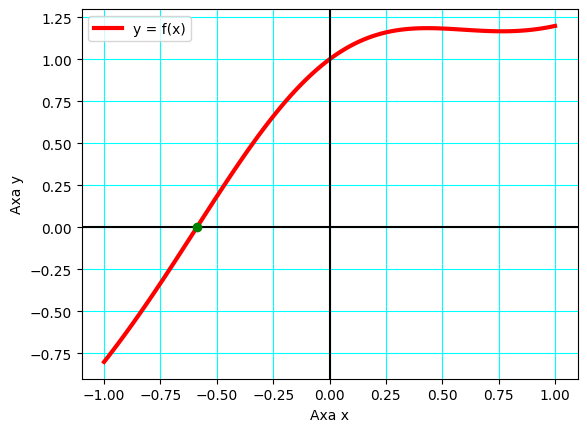

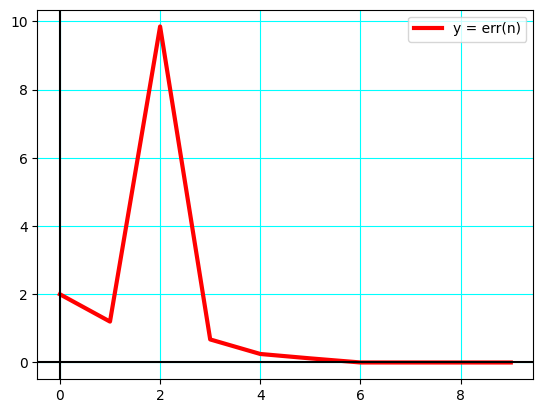

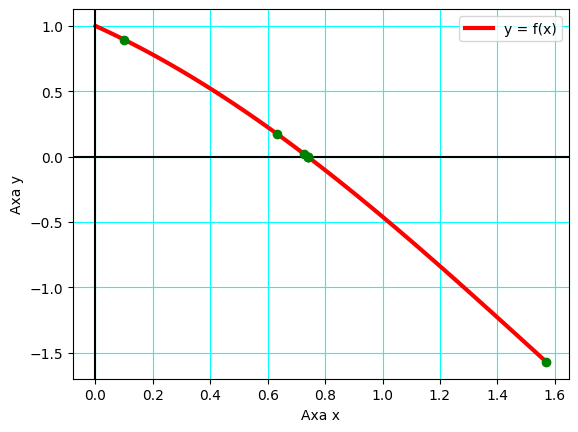

In [ ]:
#lab 3

import matplotlib.pyplot as plt
import numpy as np

# Exercitiul 1
def plot(f,a,b,nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle = '-', lw = 3, color = 'r', label = 'y = f(x)')
    ax.legend(loc = 'best')
    ax.grid(True, color = 'cyan')
    plt.xlabel('Axa x')
    plt.ylabel('Axa y')
    ax.axhline(y = 0, color = 'k')
    ax.axvline(x = 0, color = 'k')
    return ax

f = lambda x: x + np.exp(-x**2)*np.cos(x)
ax = plot(f, 1, -1, 1)

def Secanta(f, x0, x1, N):
    x = np.zeros(N+1)
    x[0] = x0
    x[1] = x1
    n = 1
    err = np.zeros(N)
    err[0] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    for n in range(2, N+1):
        x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
        err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    return x[n], err
N = 10
print("Rezultate numerice conform metodei secantei")
sol1, err1 = Secanta(f, -1, 1, N)

#reprezentarea grafica a erorii relatie ca functie de n

ngraf = np.linspace(0, N-1, N)
print(ngraf)

fig = plt.figure(2)
ax1 = plt.axes()
ax1.plot(ngraf, err1, linestyle = '-', lw = 3, color = 'r', label = 'y = err(n)')
ax1.legend(loc = 'best')
ax1.grid(True, color = 'cyan')
ax1.axhline(y = 0, color = 'k')
ax1.axvline(x = 0, color = 'k')

ax.plot(sol1, f(sol1), linestyle = 'None', marker = "o", color = 'g')



def Pozitiefalsaf(f, a, b, N):
    x = np.zeros(N+1)
    n = 1
    x[n-1] = a
    x[n] = b
    err = np.zeros(N)
    err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    n=2
    x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
    err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    for n in range(3, N+1):
        if f(x[n-1])*f(x[n-2])<=0:
            x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
            err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        else:
            x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-3])/(f(x[n-1])-f(x[n-3]))
            x[n-2]=x[n-3]
            err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    return x[n], err

N = 10
print("Rezultate numerice conform metodei pozitiei false")
sol2, err2 = Pozitiefalsaf(f, -1, 1, N)

#reprezentarea grafica a erorii prin metoda pozitiei false ca functie de n

ngraf = np.linspace(0, N-1, N)
ax1.plot(ngraf, err2, linestyle = '-', lw = 3, color = 'b', label = 'y = err(n)')

'''
#%%
# Exercitiul#2
def Secantaf(f, x0, x1, tol):
    x = [x0,x1]
    n = 1
    err = [np.abs(x[n-1]-x[n])/np.abs(x[n-1])]
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    while np.abs(f(x[n]))>tol:
        n=n+1
        x.append(x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2])))
        err.append(np.abs(x[n-1]-x[n])/np.abs(x[n-1]))
        print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    return np.array(x), np.array(err)

f=lambda x: np.cos(x)-x
ax=plot(f,0,np.pi/2,3)
sol,err=Secantaf(f, 0.1, np.pi/2, 10**-8)
ax.plot(sol, f(sol), linestyle = 'None', marker = "o", color = 'g')


In [ ]:
#lab 4

import numpy as np
import matplotlib.pyplot as plt
import prettytable as pt
import sympy as sp

def plot(f, a, b, nr_fig):
    fig=plt.figure(nr_fig)
    ax=plt.axes() #pune la dispozitie sistemul de axe
    x_graf=np.linspace(a, b, 100)
    y_graf=f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=3, color='b', label='y=f(x)')
    ax.legend(loc='best')
    ax.grid(True, color='k')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y=0, color='k')   # afiseaza axa Ox
    ax.axvline(x=0, color='k')   # afiseaza axa Oy
    return ax

f = lambda x: (x - 1) ** 2 * (x - 2)
df = lambda x: 3 * x**2 - 8 * x + 5

def NewtonRaphsonmodificata1(m,f,df,x0,ITMAX,TOL):
    X=sp.Symbol("X")
    F=f(X) #F este o expresie simbolica construita in baza functiei f
    dF=df(X)
    PHI=sp.simplify(X-(m*F)/dF)
    phi=sp.lambdify(X,PHI,"numpy")
    x=np.zeros(ITMAX)
    x[0]=x0
    n=0
    for n in range(1,ITMAX):
        x[n]=phi(x[n-1])
        if np.abs(x[n]-x[n-1])<TOL:
            return x,n
    return x,n

# Aproximarea radacinii cu metoda Newton  Raphson modificata atunci cand se cunoaste ordinul de multiplicitate
sol,iter = NewtonRaphsonmodificata1(2, f, df, 0.01, 20, 10**(-10))

# Aproximarea radacinii cu metoda Newton Raphson (Metoda Newton Raphson modificata pentru m = 1 coincide cu metoda Newton Raphson)
sol1, iter1 = NewtonRaphsonmodificata1(1, f, df, 0.01, 20, 10**(-10))

#Afisarea datelor sub forma de tabel.

print('Rezultatele numerice obtinute conform metodei Newton Raphson modificata cazul m = 2')
Tabel_data = pt.PrettyTable(['n','x_n','ErrAbs(n)','ErrRel(n)','|f(x_n)|'])
for k in range(1,iter+1):
    Tabel_data.add_row([f'{k}', f'{sol[k]:.5}', f' {np.abs(sol[k] - sol[k-1]) :.5}',f'{np.abs(sol[k] - sol[k-1])/np.abs(sol[k-1]) :.5}',f'{np.abs(f(sol[k])) :.5}' ])
print(Tabel_data)

print('Rezultatele numerice obtinute conform metodei Newton Raphson')
Tabel_data1 = pt.PrettyTable(['n','x_n','ErrAbs(n)','ErrRel(n)','|f(x_n)|'])
for k in range(1,iter1+1):
    Tabel_data1.add_row([f'{k}', f'{sol1[k]:.5}', f' {np.abs(sol1[k] - sol1[k-1]) :.5}',f'{np.abs(sol1[k] - sol1[k-1])/np.abs(sol1[k-1]) :.5}',f'{np.abs(f(sol1[k])) :.5}' ])
print(Tabel_data1)

print('Observatie: Metoda Newton Raphson modificata este mult mai rapida in cazul radacinilor multiple decat metoda Newton Raphson')




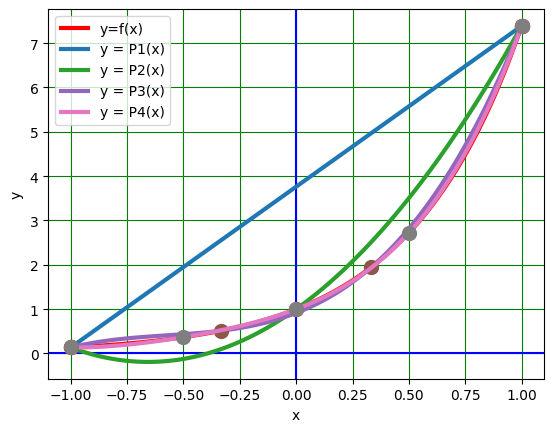

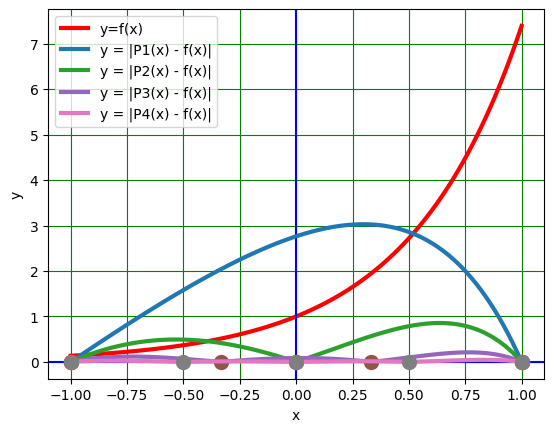

In [ ]:
#lab 5

import numpy as np
import matplotlib.pyplot as plt

def plot(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a,b,100)
    y_graf=f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=3, color='r', label="y=f(x)")
    ax.legend(loc = 'best')
    ax.grid(True, color = 'green')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y = 0, color = 'b')
    ax.axvline(x = 0, color = 'b')
    return ax

#%% Polinomul de interpolarea Lagrange
# Metoda naiva

def MetNaiva(f, a, b, n, x):
  #f = functia interpolara, intervalul [a, b], gradul polinomului n,
  #x = punctul in care se evaluaza poliomul Lagrange (scalar/vector)
  #returneaza Pn = valoarea polinomului in x
  X = np.linspace(a, b, n+1)  #nodurile de interpolare Xi, i de la 0 la n
  Y = f(X)
  A = np.zeros((n+1, n+1))
  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = X[i]**j
  c = np.linalg.solve(A, Y)    #vectorul coeficientilor
  Pn = 0
  for i in range(n+1):
    Pn = Pn + c[i]*x**i
  return Pn

f = lambda x: np.exp(2*x)
a = -1
b = 1
ax = plot(f, a, b, 1)
grade = [1, 2, 3, 4]
for n in grade:
  x_graf = np.linspace(a, b, 100)
  Pn_graf = MetNaiva(f, a, b, n, x_graf)
  ax.plot(x_graf, Pn_graf, linestyle = '-', lw = 3, label = f"y = P{n}(x)")
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, Y, linestyle = "None", marker = "o", markersize = 10)

#fig 2  - eroarea abs ...
fig = plt.figure(2)
ax = plot(f, a, b, 2)
for n in grade:
  x_graf = np.linspace(a, b, 100)
  Pn_graf = MetNaiva(f, a, b, n, x_graf)
  err_abs = np.abs(Pn_graf - f(x_graf))
  ax.plot(x_graf, err_abs, linestyle = '-', lw = 3, label = f"y = |P{n}(x) - f(x)|")
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, np.zeros_like(X), linestyle = "None", marker = "o", markersize = 10)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

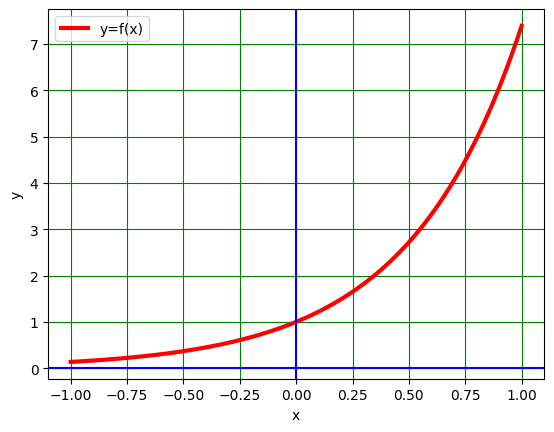

In [ ]:
#Metoda Lagrange

import numpy as np
import matplotlib.pyplot as plt

def plot(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a,b,100)
    y_graf=f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=3, color='r', label="y=f(x)")
    ax.legend(loc = 'best')
    ax.grid(True, color = 'green')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y = 0, color = 'b')
    ax.axvline(x = 0, color = 'b')
    return ax

def MetL(f, a, b, n, x):
  #f = functia interpolara, intervalul [a, b], gradul polinomului n,
  #x = punctul in care se evaluaza poliomul Lagrange (scalar/vector)
  #returneaza Pn = valoarea polinomului in x
  X = np.linspace(a, b, n+1)  #nodurile de interpolare Xi, i de la 0 la n
  Y = f(X)
  n = 0
  Pn = 0
  for k in range(n+1):
    Lnk = 1
    for i in range(n+1):
      if i != k :
        Lnk = Lnk*(x-X[i])/(X[k]-X[i])
    Pn = Pn + Lnk * Y[k]
  return Pn

f = lambda x: np.exp(2*x)
a = -1
b = 1
ax = plot(f, a, b, 3)
grade = [1, 2, 3, 4]
for n in grade:
  x_graf = np.linspace(a, b, 100)
  Pn = MetL(f, a, b, n, x_graf)
  ax.plot(x_graf, Pn, linestyle = '-', lw = 3, label = f"y = |P{n}(x) - f(x)|")
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, Y, linestyle = "None", marker = "o", markersize = 10)

fig = plt.figure(4)
ax = plot.axes()
for n in grade:
  x_graf = np.linspace(a, b, 100)
  Pn = MetL(f, a, b, n, x_graf)
  err_abs = np.abs(Pn - f(x_graf))
  ax.plot(x_graf, err_abs, linestyle = '-', lw = 3, label = f"y = |P{n}(x) - f(x)|")
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, np.zeros_like(X), linestyle = "None", marker = "o", markersize = 10)

0.7390851332151611


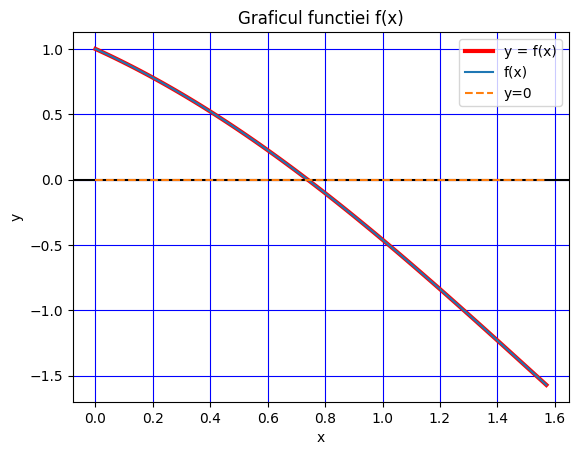

In [ ]:
#TEMA 1 LAB ANALIZA NUMERICA

#%%Ex 3 LAB 1

import numpy as np
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
### EX 1
'''
def plot(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle = '-', lw = 3, color = 'r', label = 'y = f(x)')
    ax.legend(loc = 'best')
    ax.grid(True, color = 'b')
    ax.axhline(y = 0, color = 'k')
    return ax

#(a)
g = lambda x: np.exp(-x/2)*(x**2 - 2*x - 8)
ax1 = plot(g, -3, 3, 1)

#(b)
def bisectie(f, a0, b0, ITMAX, TOL, OPT = 1):
    a = [a0]
    b= [b0]
    x = [a[0]+ (b[0] - a[0]) / 2]
    n = 0
    conditie = 1
    if OPT == 1:
          conditie = np.abs(b[n]-a[n]) > TOL
    elif OPT ==2 :
          conditie = np.abs((x[n]-x[n-1]))/np.abs(x[n-1]) > TOL
    elif OPT == 3:
        conditie = np.abs(f(x[n])) > TOL
    while (conditie and n<=ITMAX):
        n = n + 1
        if f(a[n-1]) * f(x[n-1]) <= 0:
          a.append(a[n-1])     #an = an-1
          b.append(x[n-1])     #bn = xn-1
        else:
          a.append(x[n-1])     #an = xn-1
          b.append(b[x-1])     #bn = bn-1
        x.append(a[n] + (b[n] - a[n])/2)
        if OPT == 1:
          conditie = np.abs(b[n]-a[n]) > TOL
        elif OPT ==2 :
          conditie = np.abs((x[n]-x[n-1]))/np.abs(x[n-1]) > TOL
        elif OPT == 3:
          conditie = np.abs(f(x[n])) > TOL
        return x[n], n

sol, n  = bisectie(g, -3, 3, 1e-10, 10**(-5), 1)
print(f"Solutia aproximata este {sol:.10f}")
print('solutia este:', sol)
print('n este:', n)

#(c)
x_stea = 2
x_aprox, n = bisectie(g, -3, 3, ITMAX=100, TOL=10**(-10))
err_abs = []
err_rel = []
for n in [1, 10]:
    x_aprox, _ = bisectie(g, -3, 3, ITMAX=100, TOL=1/(10**n))
    err_abs.append(abs(x_stea - x_aprox))
    err_rel.append(abs(x_stea - x_aprox) / abs(x_stea))

plt.plot([1, 10], err_abs, label='Eroarea absoluta')
plt.plot([1, 10], err_rel, label='Eroarea relativa')
plt.xlabel('n')
plt.ylabel('Eroare')
plt.title('Erori absolute si relative')
plt.legend()
plt.show()
'''
#%%Ex3 LAB 2

#(a)
def NewtonRaphson(f , df , x0 , TOL):
    x = x0
    while np.abs(f(x)) > TOL:
        x = x - f(x)/df(x)
    return x

#(b)

f = lambda x: np.cos(x) - x
df = lambda x: -np.sin(x) - 1
x0 = np.pi/4
TOL = 10**(-8)

sol = NewtonRaphson(f, df, np.pi/4, 10**(-8))
print(sol)

ax2 = plot(f, 0, np.pi/2, 2)

x = np.linspace(0, np.pi/2, 1000)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.plot([0, np.pi/2], [0, 0], '--', label='y=0')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Graficul functiei f(x)')
plt.legend()
plt.show()


n = 1| x1 = 1.5707963267948966| err = 14.707963267948964
n = 2| x2 = 0.6338505053385006| err = 0.5964782355763273
n = 3| x3 = 0.7262722927322307| err = 0.14581007132647672
n = 4| x4 = 0.7394017280237882| err = 0.018077841359147393
n = 5| x5 = 0.7390842316369994| err = 0.00042939632780866494
n = 6| x6 = 0.7390851331521455| err = 1.2197732105490605e-06


n = 1 | x1 = 1.5707963267948966 | err = 14.707963267948964
n = 2 | x2 = 0.6338505053385006 | err = 0.5964782355763273
n = 3 | x3 = 0.7262722927322307 | err = 0.14581007132647672
n = 4 | x4 = 0.7376141737528151 | err = 0.01561656851580604
n = 5 | x5 = 0.7389175042016609 | err = 0.0017669541817705765
n = 6 | x6 = 0.7390660466363108 | err = 0.0002010270886875101
n = 7 | x7 = 0.7390829601894928 | err = 2.2885036133083964e-05
n = 8 | x8 = 0.7390848858167964 | err = 2.605427817085604e-06
n = 9 | x9 = 0.7390851050489615 | err = 2.966265029843941e-07
n = 10 | x10 = 0.7390851300084512 | err = 3.377079246593709e-08
Rezultatele numerice obtinute co

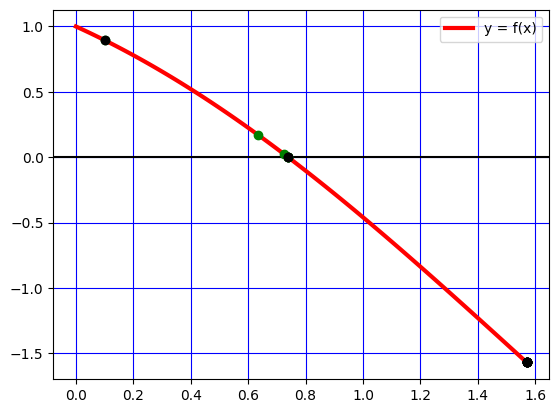

In [ ]:
#TEMA 2 LAB ANALIZA NUMERICA

#LAB 3
#EX 2

import numpy as np
import matplotlib.pyplot as plt

def plot(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle = '-', lw = 3, color = 'r', label = 'y = f(x)')
    ax.legend(loc = 'best')
    ax.grid(True, color = 'b')
    ax.axhline(y = 0, color = 'k')
    return ax

def Secantaf(f, x0, x1, tol):
    x = [x0, x1]
    n = 1
    err = [np.abs(x[n-1] - x[n]) / np.abs(x[n-1])]
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    while np.abs(f(x[n])) > tol:
        n = n + 1
        x.append(x[n-1] - f(x[n-1]) * (x[n-1]-x[n-2]) / (f(x[n-1]) - f(x[n-2])))
        err.append(np.abs(x[n-1]-x[n]) / np.abs(x[n-1]))
        print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    return np.array(x), np.array(err)

def PozitieFalsaf(f, x0, x1, tol):
    x = [x0, x1]
    n = 1
    err = [np.abs(x[n-1] - x[n]) / np.abs(x[n-1])]
    print(f"n = {n} | x{n} = {x[n]} | err = {err[n-1]}")
    while np.abs(f(x[n])) > tol:
        n = n + 1
        if f(x[n-1]) * f(x[n-2]) <= 0:
            x_nou = x[n-1] - f(x[n-1]) * (x[n-1] - x[n-2]) / (f(x[n-1]) - f(x[n-2]))
        else:
            x_nou = x[n-1] - f(x[n-1]) * (x[n-1] - x[n-3]) / (f(x[n-1]) - f(x[n-3]))
            x[n-2] = x[n-3]
        x.append(x_nou)
        err.append(np.abs(x[n-1] - x[n]) / np.abs(x[n-1]))
        print(f"n = {n} | x{n} = {x[n]} | err = {err[n-1]}")
    return np.array(x), np.array(err)

f=lambda x: np.cos(x)-x
ax=plot(f,0,np.pi/2,3)

sol1,err1 = Secantaf(f, 0.1, np.pi/2, 10**-8)
ax.plot(sol1, f(sol1), linestyle = 'None', marker = "o", color = 'g')
print('\n')
sol2,err2 = PozitieFalsaf(f, 0.1, np.pi/2, 10**-8)
ax.plot(sol2, f(sol2), linestyle = 'None', marker = "o", color = 'k')


#LAB 4
#EX 1 (De terminat) (Metoda Newton Raphson modificata - ordinul de multiplicitate m necunoscut) )

import numpy as np
import matplotlib.pyplot as plt
import prettytable as pt
import sympy as sp

f = lambda x: (x - 1) ** 2 * (x - 2)
df = lambda x: 3 * x**2 - 8 * x + 5
d2f = lambda x: 6 * x - 8

def NewtonRaphsonmodificata1(m,f,df,x0,ITMAX,TOL):
    X=sp.Symbol("X")
    F=f(X) #F este o expresie simbolica construita in baza functiei f
    dF=df(X)
    PHI=sp.simplify(X-(m*F)/dF)
    phi=sp.lambdify(X,PHI,"numpy")
    x=np.zeros(ITMAX)
    x[0]=x0
    n=0
    for n in range(1,ITMAX):
        x[n]=phi(x[n-1])
        if np.abs(x[n]-x[n-1])<TOL:
            return x,n
    return x, n

def NewtonRaphsonmodificata2(f,df,d2f,x0,ITMAX,TOL):
    X=sp.Symbol("X")
    F=f(X) #F este o expresie simbolica construita in baza functiei f
    dF=df(X)
    d2F=d2f(X)
    PHI=sp.simplify(X-(F*d2F)/(dF**2))
    phi=sp.lambdify(X,PHI,"numpy")
    x=np.zeros(ITMAX)
    x[0]=x0
    n=0
    for n in range(1,ITMAX):
        x[n]=phi(x[n-1])
        if np.abs(x[n]-x[n-1])<TOL:
            return x,n
    return x, n

# Aproximarea radacinii cu metoda Newton Raphson modificata atunci cand se cunoaste ordinul de multiplicitate
sol,iter = NewtonRaphsonmodificata1(2, f, df, 0.01, 20, 10**(-10))

# Aproximarea radacinii cu metoda Newton Raphson (Metoda Newton Raphson modificata pentru m = 1 coincide cu metoda Newton Raphson)
sol1, iter1 = NewtonRaphsonmodificata1(1, f, df, 0.01, 20, 10**(-10))

# Aproximarea radacinii cu metoda Newton Raphson modificata cu ordinul de multiplicitate m - necunoscut
sol2, iter2 = NewtonRaphsonmodificata2(f, df, d2f, 0.01, 20, 10**(-10))

#Afisarea datelor sub forma de tabel.
print('Rezultatele numerice obtinute conform metodei Newton Raphson modificata cazul m = 2')
Tabel_data = pt.PrettyTable(['n','x_n','ErrAbs(n)','ErrRel(n)','|f(x_n)|'])
for k in range(1,iter+1):
    Tabel_data.add_row([f'{k}', f'{sol[k]:.5}', f' {np.abs(sol[k] - sol[k-1]) :.5}',f'{np.abs(sol[k] - sol[k-1])/np.abs(sol[k-1]) :.5}',f'{np.abs(f(sol[k])) :.5}' ])
print(Tabel_data)

# Crearea tabelului pentru metoda NewtonRaphsonmodificata1 (m = 2)
print('Rezultatele numerice obtinute conform metodei Newton Raphson modificata cazul m = 2')
Tabel_data1 = pt.PrettyTable(['n', 'x_n', 'ErrAbs(n)', 'ErrRel(n)', '|f(x_n)|'])
for k in range(1, iter + 1):
    Tabel_data1.add_row([f'{k}', f'{sol[k]:.5}', f' {np.abs(sol[k] - sol[k-1]) :.5}', f'{np.abs(sol[k] - sol[k-1])/np.abs(sol[k-1]) :.5}', f'{np.abs(f(sol[k])) :.5}' ])
print(Tabel_data1)

print('Rezultatele numerice obtinute conform metodei Newton Raphson modificata cazul m necunoscut')
Tabel_data2 = pt.PrettyTable(['n','x_n','ErrAbs(n)','ErrRel(n)','|f(x_n)|'])
for k in range(1,iter+1):
    Tabel_data2.add_row([f'{k}', f'{sol[k]:.5}', f' {np.abs(sol[k] - sol[k-1]) :.5}',f'{np.abs(sol[k] - sol[k-1])/np.abs(sol[k-1]) :.5}',f'{np.abs(f(sol[k])) :.5}' ])
print(Tabel_data)




In [ ]:
#LAB 4
#Ex 2

import numpy as np

# (a) Funcția pentru metoda Aitken
def Aitken(f, phi, x0, ITMAX, TOL):
    x_n = x0
    iter = 0
    sol = x0

    while iter < ITMAX:
        x_n1 = phi(x_n)
        x_n2 = phi(x_n1)

        sol = x_n2 - (x_n1 - x_n2)**2 / (x_n - 2 * x_n1 + x_n2)

        ErrAbs = abs(sol - x_n)
        ErrRel = ErrAbs / abs(sol)

        if ErrAbs < TOL or ErrRel < TOL or abs(f(sol)) < TOL:
            break

        x_n = sol
        iter += 1

    return sol, iter

# (b) Funcția pentru metoda Steffensen
def Steffensen(f, phi, x0, ITMAX, TOL):
    x_n = x0
    iter = 0
    sol = x0

    while iter < ITMAX:
        x_n1 = phi(x_n)
        x_n2 = phi(x_n1)

        sol = x_n2 - (x_n1 - x_n2)**2 / (x_n - 2 * x_n1 + x_n2)

        ErrAbs = abs(sol - x_n)
        ErrRel = ErrAbs / abs(sol)

        if ErrAbs < TOL or ErrRel < TOL or abs(f(sol)) < TOL:
            break

        x_n = sol
        iter += 1

    return sol, iter

# (c) Funcția pentru metoda Newton-Raphson
def NewtonRaphsonf(f, df, x0, ITMAX, TOL):
    x = x0
    iter = 0

    while iter < ITMAX:
        x_nou = x - f(x) / df(x)

        ErrAbs = abs(x_nou - x)
        ErrRel = ErrAbs / abs(x_nou)

        if ErrAbs < TOL or ErrRel < TOL or abs(f(x_nou)) < TOL:
            break

        x = x_nou
        iter += 1

    return x, iter

# Definirea functiei f
def f(x):
    return x**3 - 4*x**2 + 5*x - 2

# Definirea derivatei functiei f
def df(x):
    return 3*x**2 - 8*x + 5

# Definirea functiei de punct fix asociata metodei Newton-Raphson
def phi(x):
    return x - f(x) / df(x)

# Definirea datelor de intrare
x0 = 0
ITMAX = 20
TOL = 1e-10

# Apelarea metodei Aitken
sol_aitken, iter_aitken = Aitken(f, phi, x0, ITMAX, TOL)

# Apelarea metodei Steffensen
sol_steffensen, iter_steffensen = Steffensen(f, phi, x0, ITMAX, TOL)

# Apelarea metodei Newton-Raphson
sol_newton, iter_newton = NewtonRaphsonf(f, df, x0, ITMAX, TOL)

# Afișarea rezultatelor sub forma unui tabel
print("{:<6} {:<16} {:<16} {:<16} {:<16} {:<16}".format("Iter", "x", "ErrAbs", "ErrRel", "|f(x)|", "TOL"))
print("-" * 80)
print("{:<6} {:<16e} {:<16e} {:<16e} {:<16e} {:<16e}".format(iter_aitken, sol_aitken, abs(sol_aitken - x0), abs(sol_aitken - x0) / abs(sol_aitken), abs(f(sol_aitken)), TOL))
print("{:<6} {:<16e} {:<16e} {:<16e} {:<16e} {:<16e}".format(iter_steffensen, sol_steffensen, abs(sol_steffensen - x0), abs(sol_steffensen - x0) / abs(sol_steffensen), abs(f(sol_steffensen)), TOL))
print("{:<6} {:<16e} {:<16e} {:<16e} {:<16e} {:<16e}".format(iter_newton, sol_newton, abs(sol_newton - x0), abs(sol_newton - x0) / abs(sol_newton), abs(f(sol_newton)), TOL))

'''

In [ ]:
###LAB 6

import numpy as np
import matplotlib.pyplot as plt


# Graficul functiei
def grafic(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()  # pune la dispozitie sistemul de axe
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=3, color='b', label='y=f(x)')
    ax.legend(loc='best')
    ax.grid(True, color='k')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y=0, color='k')  # afiseaza axa Ox
    ax.axvline(x=0, color='k')  # afiseaza axa Oy
    return ax

def MetNewton(f, a, b, n, x):
  #f = functia interpolara, intervalul [a, b], gradul polinomului n,
  #x = punctul in care se evaluaza poliomul Lagrange (scalar/vector)
  #returneaza Pn = valoarea polinomului in x
  X = np.linspace(a, b, n+1)  #nodurile de interpolare Xi, i de la 0 la n
  Y = f(X)
  A = np.zeros((n+1, n+1))
  for i in range(0, n+1):
    A[i, 0] = 1
  for i in range(1, n+1):
    for j in range(1, i+1):
      P = 1
      for k in range(0, j):
        P = P * (X[i] - X[k])
      A[i, j] = P
  c = np.linalg.solve(A, Y)
  Pn  = c[0]
  for k in range(1, n+1):
    Pr = np.ones_like(x)
    for j in range(0, k):
      Pr = P *(x-X[j])
    Pn = Pn + c[k]*Pr
  return Pn

f = lambda x: np.exp(2*x)
a = -1
b = 1
ax = plot(f, a, b, 1)
grade = [2]
for n in grade:
  x_graf = np.linspace(a, b, 100)
  Pn_graf = MetNewton(f, a, b, n, x_graf)
  ax.plot(x_graf, Pn_graf, linestyle = '-', lw = 3, label = f"y = P{n}(x)")
  ax.legend(loc = 'best')
  X = np.linspace(a, b, n+1)
  Y = f(X)
  ax.plot(X, Y, linestyle = "None", marker = "o", markersize = 10)



n = 1.00000e+00 | x1 = 1.97000e+00 | |f(x1)| = 6.48560e-01


TypeError: ignored

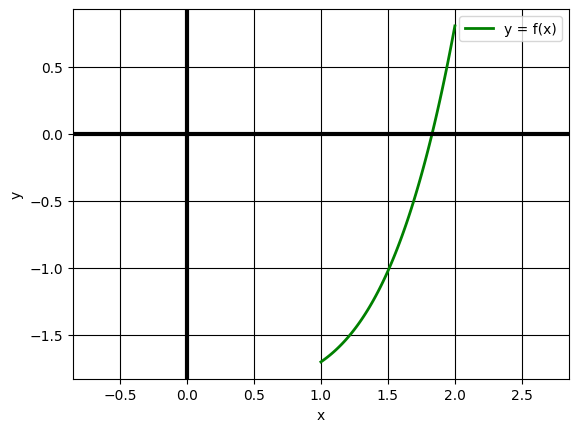

In [ ]:
#TEST 1 --> ANALIZA NUMERICA
#NUME: MIHALACHE DIANA
#GRUPA: 321

import numpy as np
import matplotlib.pyplot as plt

#EX 1
#a)
f = lambda x: np.exp(x) + 1/(2**(x)) + 2*np.cos(x) - 6
#f = lambda x: np.exp(x) + 2**(-x) + 2*np.cos(x) - 6


def Grafic(f, a, b, nr_fig):
    figura = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle = '-', lw = 2, color = 'g', label = 'y = f(x)')
    ax.legend(loc = 'best')
    ax.grid(True, color = 'k')
    plt.xlabel('x', color = 'k')
    plt.ylabel('y', color = 'k')
    ax.axhline(y = 0, lw = 3, color = 'k')
    ax.axvline(x = 0, lw = 3, color = 'k')
    plt.axis('equal')
    return ax

ax1 = Grafic(f, 1, 2, 1)


#b)
def MetSecanta(f, x0, x1, TOL):
    x = [x0, x1]
    n = 1
    err = [np.abs(x[n-1] - x[n]) / np.abs(x[n-1])]
    print(f'n = {n:.5e} | x{n} = {x[n]:.5e} | |f(x{n})| = {np.abs(f(x[n])):.5e}')
    while np.abs(x[n] - x[n-1]) / np.abs(x[n-1]) > TOL:
        n = n+1
        x.append([x[n-1] - f(x[n-1]) * (x[n-1] - x[n-2]) / (f(x[n-1]) - f(x[n-2]))])
        err.append([np.abs(x[n] - x[n-1]) / np.abs(x[n-1])])
        print(f'n = {n:.5e} | x{n} = {x[n]:.5e} | |f(x{n})| = {np.abs(f(x[n])):.5e}')
    return np.array(x)

#c) + d)
x0 = 0.1
x1 = 1.97
x_sol = MetSecanta(f, x0, x1, TOL = 10**(-10))

ax1.plot(x_sol, f(x_sol), linestyle = 'None', marker = 'o', markersize = 10, color = 'r')

#e)
print('Solutia este: ', x_sol)


#%% EX 2
#f, g definite pe [0.5; 1,5]
f1 = lambda x: np.exp(x) - 2
g = lambda x: np.cos(np.exp(x) - 2)

TOL = 10**(-10)
axf1 = Grafic(f1, 0.5, 1.5, 2)

axg = Grafic(g, 0.5, 1.5, 2)


abscisa1 = MetSecanta(f1, x0 = 0.1, x1 = 2.3, TOL = 10**(-10))
abscisa2 = MetSecanta(g, x0 = 0.1, x1 = 2.3, TOL = 10**(-10))
axf1.plot(abscisa1, f1(abscisa1), linestyle = 'None', marker = 'o', markersize = 10, color = 'r')
axg.plot(abscisa2, g(abscisa2), linestyle = 'None', marker = 'o', markersize = 10, color = 'b')

x = np.linspace(0.5, 1.5, 100)
for punct in x:
    if f1(punct) == g(punct):
        print('Intersectia graficelor se realizeaza in abscisa punctului: ', punct)
        axf1.plot(punct, f1(punct), linestyle = 'None', marker = 'O', markersize = 15, color = 'y')

n = 1.00000e+00 | x1 = 1.97000e+00 | |f(x1)| = 6.48560e-01
Solutia este:  [0.1  1.97]
n = 1.00000e+00 | x1 = 1.30000e+00 | |f(x1)| = 1.66930e+00
n = 1.00000e+00 | x1 = 1.30000e+00 | |f(x1)| = 9.83411e-02


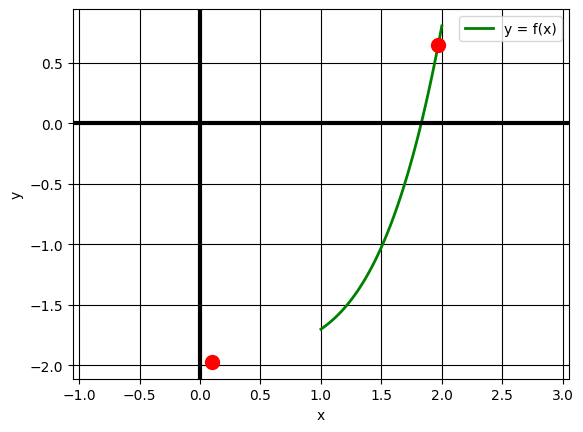

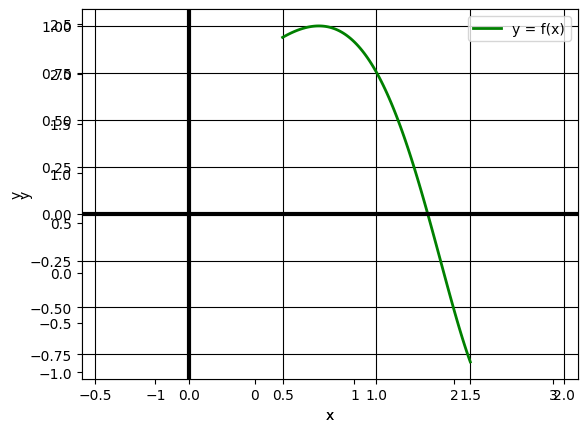

In [ ]:
#testul 1 corectat laANNUM

import numpy as np
import matplotlib.pyplot as plt

# EX 1
# a)
f = lambda x: np.exp(x) + 1/(2**(x)) + 2*np.cos(x) - 6

def Grafic(f, a, b, nr_fig):
    figura = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=2, color='g', label='y = f(x)')
    ax.legend(loc='best')
    ax.grid(True, color='k')
    plt.xlabel('x', color='k')
    plt.ylabel('y', color='k')
    ax.axhline(y=0, lw=3, color='k')
    ax.axvline(x=0, lw=3, color='k')
    plt.axis('equal')
    return ax

ax1 = Grafic(f, 1, 2, 1)

# b)
def MetSecanta(f, x0, x1, TOL):
    x = [x0, x1]
    n = 1
    err = [np.abs(x[n-1] - x[n]) / np.abs(x[n-1])]
    print(f'n = {n:.5e} | x{n} = {x[n]:.5e} | |f(x{n})| = {np.abs(f(x[n])):.5e}')
    while np.abs(x[n] - x[n-1]) / np.abs(x[n-1]) <= TOL:
        n = n + 1
        x.append(x[n-1] - f(x[n-1]) * (x[n-1] - x[n-2]) / (f(x[n-1]) - f(x[n-2])))
        err.append(np.abs(x[n] - x[n-1]) / np.abs(x[n-1]))
        print(f'n = {n:.5e} | x{n} = {x[n]:.5e} | |f(x{n})| = {np.abs(f(x[n])):.5e}')
    return np.array(x)

# c) + d)
x0 = 0.1
x1 = 1.97
x_sol = MetSecanta(f, x0, x1, TOL=10**(-10))

ax1.plot(x_sol, f(x_sol), linestyle='None', marker='o', markersize=10, color='r')

# e)
print('Solutia este: ', x_sol)

# EX 2
# f, g definite pe [0.5; 1,5]
f1 = lambda x: np.exp(x) - 2
g = lambda x: np.cos(np.exp(x) - 2)

TOL = 10**(-10)
axf1 = Grafic(f1, 0.5, 1.5, 2)

axg = Grafic(g, 0.5, 1.5, 2)

abscisa1 = MetSecanta(f1, x0=0.1, x1=1.3, TOL=10**(-10))
abscisa2 = MetSecanta(g, x0=0.1, x1=1.3, TOL=10**(-10))
axf1.plot(abscisa1, f1(abscisa1), linestyle='None', marker='o', markersize=10, color='r')
axf1.plot(abscisa2, g(abscisa2), linestyle='None', marker='o', markersize=10, color='b')

x = np.linspace(0.5, 1.5, 100)
for punct in x:
    if f1(punct) == g(punct):
        print('Intersectia graficelor se realizeaza in abscisa punctului: ', punct)
        axf1.plot(punct, f1(punct), linestyle='None', marker='O', markersize=15, color='y')

